# 📌 Learning Roadmap for Time Series Analysis

🟢 Stage 1: Fundamentals of Time Series Analysis
-
- What is a Time Series? Understanding sequential data and its characteristics.
- Types of Time Series Data (Stock prices, weather data, economic indicators, etc.).
- Components of Time Series (Trend, Seasonality, Cyclic patterns, and Random noise).
- Time Series vs. Cross-Sectional Data vs. Panel Data
- Basic Plotting & Visualization of Time Series Data

🟡 Stage 2: Exploratory Data Analysis (EDA) for Time Series
-
- Identifying trends and seasonal patterns.
- Smoothing techniques (Rolling Mean, Moving Averages).
- Handling missing values and outliers in time series.

🟠 Stage 3: Time Series Decomposition & Statistical Methods
-
- Additive vs. Multiplicative decomposition.
- ACF (Autocorrelation Function) & PACF (Partial Autocorrelation Function).
- Stationarity & Unit Root Tests (ADF Test, KPSS Test).

🔵 Stage 4: Time Series Forecasting Methods
-
- Classical Statistical Models:
- AR (Autoregressive) Model
- MA (Moving Average) Model
- ARMA, ARIMA, and SARIMA Models
- Machine Learning-Based Approaches:
- Feature Engineering for Time Series
- Regression models for forecasting
- Random Forest & Gradient Boosting for Time Series
- Deep Learning-Based Approaches:
- LSTMs (Long Short-Term Memory Networks)
- CNNs for Time Series
- Transformer-based models

🔴 Stage 5: Advanced Topics & Real-World Applications
-
- Anomaly Detection in Time Series.
- Handling multiple time series (Multivariate forecasting).
- Time Series Forecasting in Business & Finance.
- Practical implementation using Python (Pandas, Statsmodels, Scikit-Learn, TensorFlow).

## 🟢 Stage 1: Fundamentals of Time Series Analysis

### What is a Time Series?
A time series is a sequence of data points collected at regular time intervals. Unlike regular datasets, where observations are independent, time series data has a natural order and is influenced by past values.

🔹 Example:
- Daily stock prices
- Monthly sales of a retail store
- Hourly temperature readings
- Website traffic per minute
___
### Types of Time Series Data
1. Discrete Time Series → Data recorded at specific time intervals (e.g., daily closing stock prices).
2. Continuous Time Series → Data recorded continuously (e.g., ECG signals, streaming sensor data).

🔹 Real-World Examples:

- **Finance**: Stock prices, exchange rates
- **Economics**: GDP, inflation rates
- **Healthcare**: Patient vitals over time
- **Weather**: Temperature, rainfall
- **Retail & Sales**: Demand forecasting
___
### Components of Time Series
Every time series can be broken down into key components:

1. **Trend (T)** → Long-term upward or downward movement.
- Example: Rising housing prices over decades.

2. **Seasonality (S)** → Repeating patterns at fixed intervals.
- Example: Increased ice cream sales every summer.

3. **Cyclic Pattern (C)** → Long-term fluctuations (not fixed like seasonality).
- Example: Business cycles (boom & recession).

4. **Random Noise (Irregular Component, R)** → Unpredictable variations.
- Example: Sudden spikes in stock prices due to news events.

🔹 Mathematical Representation:

A time series can be represented as:

Additive model: $Y_t = T_t + S_t + C_t + R_t$
-
OR

Multiplicative model: $Y_t = T_t$ x $S_t$ x $C_t$ x $R_t$
-
___
### Time Series vs. Cross-Sectional vs. Panel Data
- Time Series Data → Data collected over time (e.g., Apple’s stock price over 5 years).
- Cross-Sectional Data → Data collected at a single point in time (e.g., exam scores of 100 students).
- Panel Data → Combination of both (e.g., stock prices of 5 companies over 10 years)
___
### Basic Plotting & Visualization of Time Series

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Sample dataset (Monthly sales data)
dates = pd.date_range(start="2020-01", periods=24, freq="M")
sales = [120, 135, 150, 160, 180, 190, 200, 220, 240, 260, 280, 300,
         310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530]

In [3]:
df = pd.DataFrame({"Date": dates, "Sales": sales})
df.set_index("Date", inplace=True)
df.head()

,Sales
Date,
2020-01-31,120
2020-02-29,135
2020-03-31,150
2020-04-30,160
2020-05-31,180


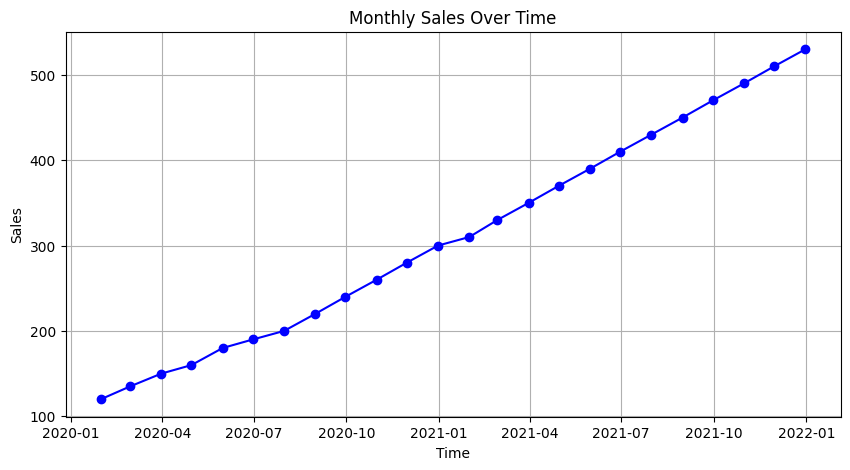

In [4]:
# Plot the time series
plt.figure(figsize = (10,5))
plt.plot(df, marker="o", linestyle="-", color="b")
plt.title("Monthly Sales Over Time")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.grid()
plt.show()

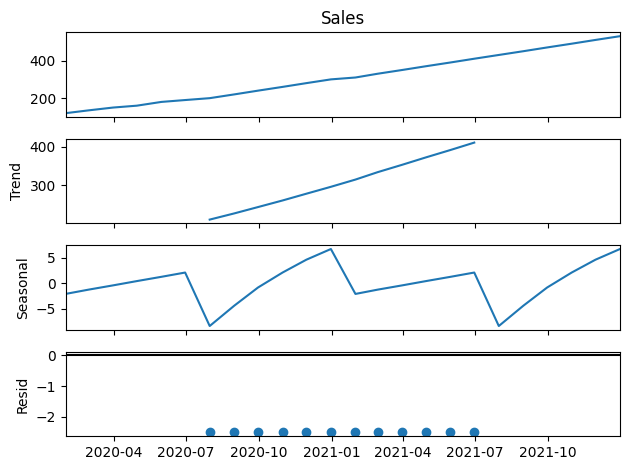

In [5]:
seasonal_decompose(df['Sales']).plot()
plt.show()

🔹 What this tells us:
- If there’s a trend (upward/downward).
- If there are seasonal patterns.
- If the data is random or follows a structure.
___
### Common Mistakes to Avoid
- **Ignoring Time Order**: Always respect the time sequence (don't shuffle time series data like normal datasets).
- **Forgetting to Check Stationarity**: Many forecasting models assume data is stationary.
- **Overfitting with Complex Models**: Start simple before moving to advanced forecasting techniques.
___
## 🟡 Stage 2: Exploratory Data Analysis (EDA) for Time Series

### 1. Checking for Trends & Seasonality
🔹 Identifying Trends

A trend represents the long-term movement in a time series (upward/downward).

#### How to detect trends?
- Visual Inspection: Plot the time series and observe.
- Moving Average Smoothing: Use rolling means to smooth fluctuations.
- Statistical Tests: Use regression models or differencing.

🔹 **Moving Averages**: Moving Averages help smooth out fluctuations in data to reveal underlying trends

🔹 Types of Moving Averages
1. **Simple Moving Average (SMA)**: Equal weight to all values in the window.

$SMA_t = \frac{1}{n}\sum_{i = 0}^{n - 1} x_{t - i}$
-
- $SMA_t$: Moving Average at time t
- $x_{t - i}$: Value at time $t-i$
- $n$: Window size (number of past observations used)

Example:

`Data: [10, 20, 30, 40, 50]`

`Window = 3`

`SMA(3) = [(10+20+30)/3, (20+30+40)/3, (30+40+50)/3]`
 
`Result = [Nan, Nan, 20, 30, 40]`

2. **Exponential Moving Average (EMA)**: Assigns more weight to recent data using an exponential decay factor.

$EMA_t = \alpha.x_t + (1-\alpha).EMA_{t-1}$
-
- $\alpha$: smoothing factor $(\alpha = \frac{2}{n+1})$

3. **Weighted Moving Average (WMA)**: Assigns different weights to observations (more recent data gets higher weight).

$WMA_t = \frac{\sum_{i = 1}^{n} w_i x_{t - i + 1}}{\sum_{i = 1}^{n - 1} w_i}$
-

4. **Cumulative Moving Average (CMA)**: Includes all past data points in the average

$CMA_t = \frac{1}{t}\sum_{i = 1}^{t} x_i$
-

5. **Triangular Moving Average (TMA)**: Assigns peak weight to the middle of the window, reducing noise more than SMA.

6. **Adaptive Moving Average (AMA or KAMA)**: Adjusts the smoothing factor based on market volatility.

7. **Hull Moving Average (HMA)**: Reduces lag by using weighted averages and a square root of the period.

🔹 Python Example – Moving Average for Trend Detection

In [9]:
dates = pd.date_range(start="2020-01", periods=24, freq="M")
sales = [120, 135, 150, 160, 180, 190, 200, 220, 240, 260, 280, 300,
         310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530]

In [10]:
df = pd.DataFrame({"Date": dates, "Sales": sales})
df.set_index("Date", inplace=True)

In [11]:
# Rolling Mean (Moving Average)
df["Moving_Avg"] = df["Sales"].rolling(window = 3).mean()
df.head()

,Sales,Moving_Avg
Date,,
2020-01-31,120,NaN
2020-02-29,135,NaN
2020-03-31,150,135.000000
2020-04-30,160,148.333333
2020-05-31,180,163.333333


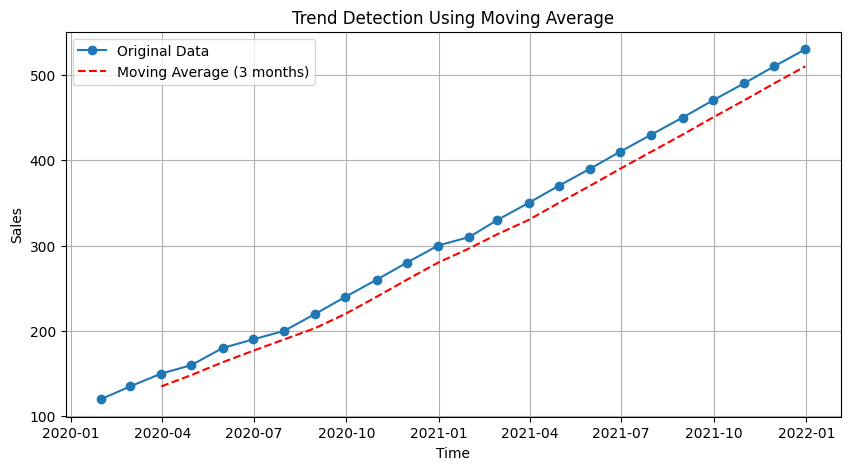

In [12]:
plt.figure(figsize=(10,5))
plt.plot(df["Sales"], marker="o", linestyle="-", label="Original Data")
plt.plot(df["Moving_Avg"], color="red", linestyle="--", label="Moving Average (3 months)")
plt.legend()
plt.title("Trend Detection Using Moving Average")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.grid()
plt.show()

🔹 Key Observations:
- If the moving average line is consistently going up/down, there’s a trend.
- If the moving average fluctuates in a cyclic manner, there’s seasonality.

🔹 Identifying Seasonality
- Seasonality means recurring patterns at fixed intervals (daily, weekly, monthly, yearly).

#### How to detect seasonality?
- Plotting the data (look for repeating patterns).
- Autocorrelation Function (ACF) – Measures how past values influence future values.
- Fourier Transform – Converts time series into frequency components.

🔹 Python Example – ACF for Seasonality Detection

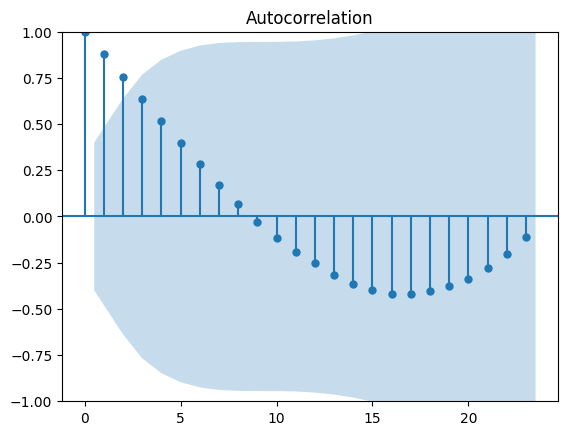

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelation plot
plot_acf(df['Sales'], lags = 23)  # Checking correlation up to 24 months
plt.show()

### 2. Handling Missing Values in Time Series
Missing data is common in real-world time series. Some ways to handle it:

🔹 Methods to Handle Missing Data:
1. Forward Fill (ffill) – Use previous value.
2. Backward Fill (bfill) – Use next value.
3. Interpolation – Estimate values between known data points.
4. Model-based Imputation – Predict missing values using machine learning.

🔹 Python Example – Handling Missing Data

In [48]:
df_missing = df.copy()
df_missing.iloc[5:8] = None  # Introduce missing values

In [49]:
df_missing["Sales_Filled"] = df_missing["Sales"].interpolate()

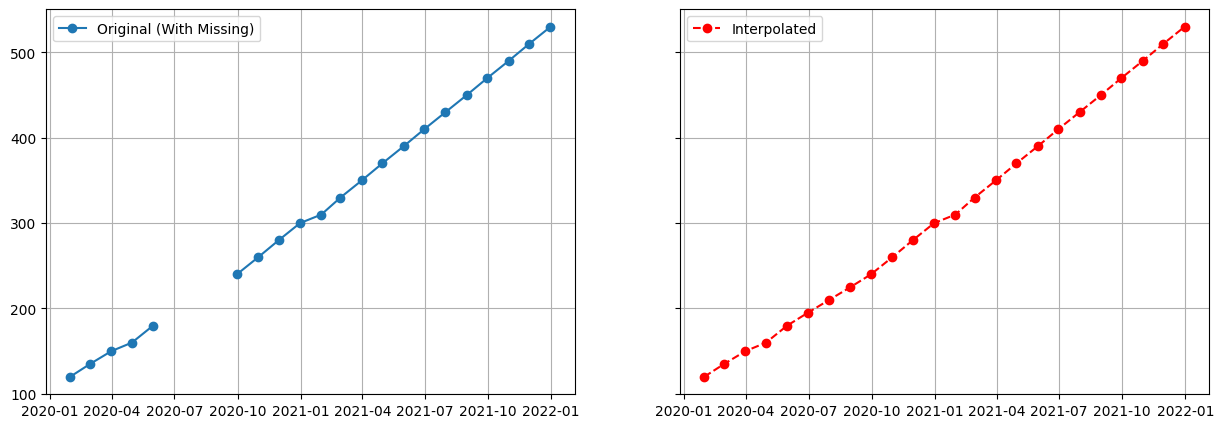

In [82]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharey = True)
ax = ax.flatten()

ax[0].plot(df_missing['Sales'], marker = 'o', linestyle = '-', label = 'Original (With Missing)')
ax[0].grid()
ax[0].legend()

ax[1].plot(df_missing["Sales_Filled"], marker="o", linestyle="--", color="red", label="Interpolated")
ax[1].grid()
ax[1].legend()

plt.show()

🔹 Key Takeaways:
- Use forward/backward fill for continuous data.
- Use interpolation when data follows a trend.
- Use ML models when data is highly irregular.
___
### 3. Detrending and Differencing (Making Data Stationary)
Many time series models (like ARIMA) assume data is stationary (constant mean & variance).

🔹 Criteria for a Stationary data
- Constant Mean
- Constant Variance
- No trend or seasonality

🔹 How to check stationarity?
- Rolling Mean & Variance Test
- Augmented Dickey-Fuller (ADF) Test

🔹 Python Example – ADF Test

If p-value < 0.05, the data is stationary (ready for modeling).

If p-value > 0.05, we apply differencing to remove trends:

In [128]:
from statsmodels.tsa.stattools import adfuller

# Run ADF Test
adf_result = adfuller(df["Sales"])
print("ADF Test Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# If p-value < 0.05 → Data is stationary

ADF Test Statistic: -0.2897213085257823
p-value: 0.9269475394252609


In [30]:
df["Sales_Diff"] = df["Sales"].diff().dropna()

In [31]:
df

,Sales,Moving_Avg,Sales_Diff
Date,,,
2020-01-31,120,NaN,NaN
2020-02-29,135,NaN,15.0
2020-03-31,150,135.000000,15.0
2020-04-30,160,148.333333,10.0
2020-05-31,180,163.333333,20.0
2020-06-30,190,176.666667,10.0
2020-07-31,200,190.000000,10.0
2020-08-31,220,203.333333,20.0
2020-09-30,240,220.000000,20.0


### Common Mistakes to Avoid
- Not visualizing trends & seasonality before modeling.
- Ignoring missing values – leads to incorrect forecasts.
- Using non-stationary data for ARIMA models
___
## 🟠 Stage 3: Time Series Decomposition & Autocorrelation Analysis

### 1. Time Series Decomposition
Decomposition helps us separate a time series into:
- Trend (Long-term movement)
- Seasonality (Repeating patterns)
- Residual/Noise (Unexplained variations)

🔹 Types of Decomposition:

1. Additive Model → If trend and seasonality remain constant over time:

$Y_T = T_t + S_t + R_t$
-
2. Multiplicative Model →  If trend and seasonality increase or decrease over time:

$Y_t = T_t$ x $S_t$ x $R_t$
-

Real-World Example:
- Additive: Daily temperature (fluctuates around a mean).
- Multiplicative: Retail sales (sales increase over time but seasonality grows).

🔹 Python Example – Decomposing a Time Series

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
np.random.seed(42)
n = 100
steps = np.random.choice([-1, 1], size=n)

time_series = np.cumsum(steps)

In [98]:
# Set seed for reproducibility
np.random.seed(42)
n = 365
dates = pd.date_range(start = '2024-01-01', periods = n, freq = 'D')

In [99]:
# Generate trend (linear growth)
trend = np.linspace(100, 500, n)  # Sales gradually increase from 100 to 500

# Generate seasonality:
# - Weekly pattern (higher sales on weekends)
weekly_seasonality = 50 * np.sin(np.linspace(0, 2 * np.pi * (n / 7), n))

# - Monthly pattern (higher sales at the beginning of the month)
monthly_seasonality = 30 * np.sin(np.linspace(0, 2 * np.pi * (n / 30), n))

# Generate random noise
noise = np.random.normal(scale = 20, size = n)

# Combine all components
sales = trend + weekly_seasonality + monthly_seasonality + noise

# Ensure sales values are not negative
sales = np.maximum(sales, 0)

In [100]:
# Create DataFrame
df = pd.DataFrame({"Date": dates, "Sales": sales})
df.set_index('Date')
df.head()

,Date,Sales
0,2024-01-01,109.934283
1,2024-01-02,143.756178
2,2024-01-03,176.076133
3,2024-01-04,172.793064
4,2024-01-05,99.915554


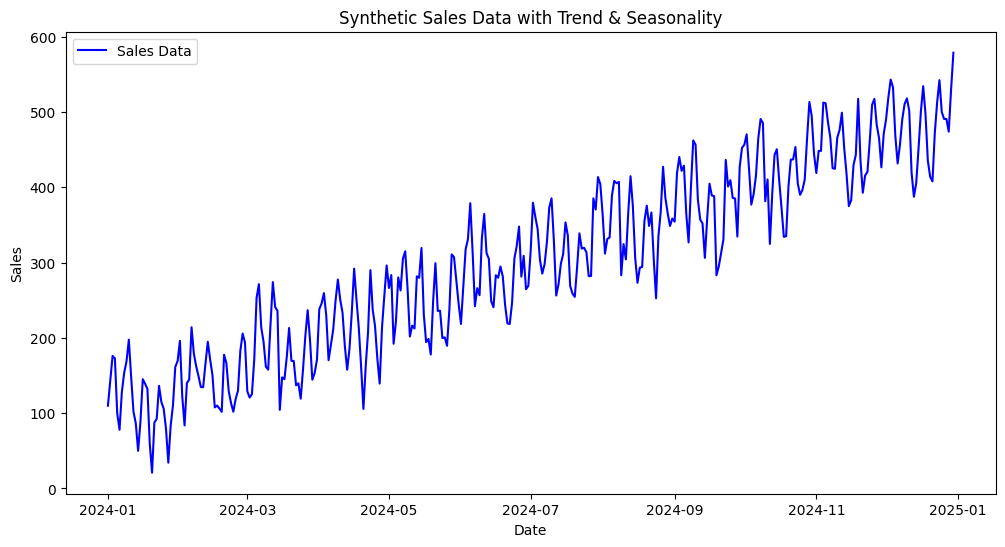

In [101]:
# Plot sales data
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Sales"], label="Sales Data", color="blue")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Synthetic Sales Data with Trend & Seasonality")
plt.legend()
plt.show()

In [108]:
# Decomposition
decomposition = seasonal_decompose(df['Sales'], model = 'additive', period = 12)

<Figure size 1000x600 with 0 Axes>

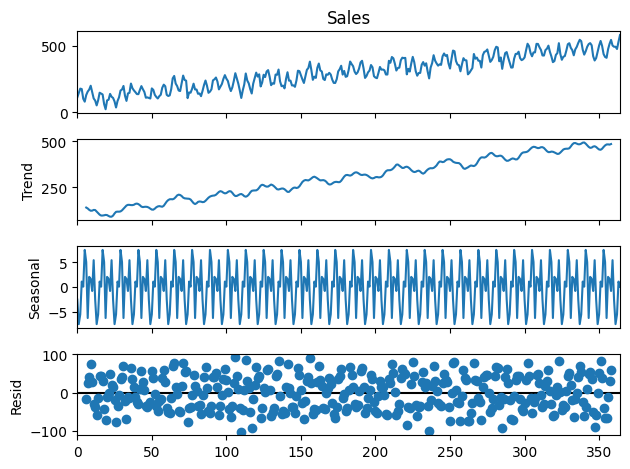

In [109]:
# Plot components
plt.figure(figsize=(10,6))
decomposition.plot()
plt.show()

### 2. Autocorrelation & Partial Autocorrelation
Autocorrelation measures how a time series relates to its past values.

🔹 Why is Autocorrelation Important?
- Helps identify lags (how past values influence future ones).
- Essential for ARIMA models (used to set AR and MA terms).

🔹 Two Key Concepts:
1. **Autocorrelation Function (ACF)** → Shows correlation between a time series and its lagged values.
2. **Partial Autocorrelation Function (PACF)** → Measures the direct correlation after removing indirect effects.

Example:

- Stock prices today might be correlated with prices 1 week ago (lag=7).
- If sales depend only on the previous month’s sales, PACF will show a strong correlation at lag=1, but ACF might show correlation at multiple lags.

In [110]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

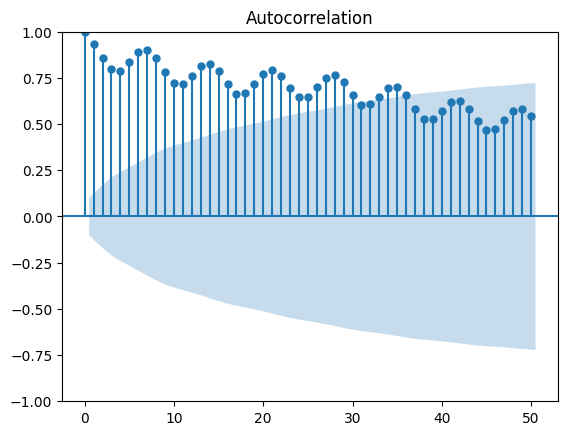

In [125]:
# ACF Plot
plot_acf(df['Sales'], lags = 50)
plt.show()

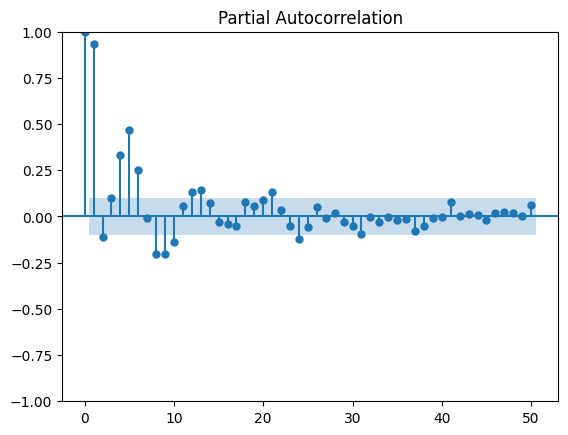

In [126]:
# PACF Plot
plot_pacf(df["Sales"], lags = 50)
plt.show()

#### How to Interpret Plots?
- A slow decay in ACF → Suggests an AR model.
- A sharp cutoff in ACF → Suggests an MA model.
- PACF helps determine the AR term order in ARIMA.

OR
- Slow decay in ACF & sharp cutoff in PACF → Suggests an AR(p) model.
- Sharp cutoff in ACF & slow decay in PACF → Suggests an MA(q) model.
- Slow decay in both ACF and PACF → Suggests a mixed ARMA(p, q) or ARIMA(p, d, q) model.

### Common Mistakes to Avoid
- Not checking decomposition before modeling.
- Misinterpreting ACF/PACF – They indicate lag dependencies, not trends!
- Assuming seasonality without statistical validation.
___
## 🟢 Stage 4: Time Series Forecasting Methods (ARIMA, SARIMA, ML Models)

### 1. ARIMA (AutoRegressive Integrated Moving Average)
ARIMA is one of the most powerful classical time series models. It consists of three components:

- AR (AutoRegressive) → Uses past values (lags) to predict the future.
- I (Integrated) → Differencing is applied to make data stationary.
- MA (Moving Average) → Uses past errors (noise) to improve predictions.

🔹 Finding the Best ARIMA Model (p, d, q)
- p (AR order) → Number of past values used (from PACF plot).
- d (Differencing order) → Number of times we make data stationary.
- q (MA order) → Number of past errors used (from ACF plot).

🔹 Steps to Build ARIMA Model:
1. Ensure Stationarity (Apply ADF test, differencing if needed).
2. Determine (p, d, q) using ACF & PACF plots.
3. Train ARIMA and Evaluate Performance.

🔹 Python Example – ARIMA Forecasting

In [127]:
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Make data stationary (if needed)
df["Sales_Diff"] = df["Sales"].diff().dropna()

# Step 2: Fit ARIMA Model (Choose p, d, q based on ACF/PACF)
model = ARIMA(df["Sales"], order=(2,1,2))  # Example order (p=2, d=1, q=2)
model_fit = model.fit()

# Step 3: Forecast
forecast = model_fit.forecast(steps=12)  # Predict next 12 months
print(forecast)


365    596.306536
366    579.681291
367    542.782223
368    513.466817
369    512.696721
370    539.622144
371    573.277944
372    588.836263
373    575.867563
374    545.220093
375    520.073095
376    518.457290
Name: predicted_mean, dtype: float64


When to use ARIMA?
- When data has no seasonality but a clear trend.
- When past values strongly influence future values.
___
### 2. SARIMA (Seasonal ARIMA) – Handling Seasonality
ARIMA does not handle seasonality well. SARIMA extends ARIMA by adding seasonal terms:

$(p, d, q)$ x $(P, D, Q, s)$
- 
$P, D, Q$: Seasonal AR, differencing, and MA terms.

$s$: Seasonal cycle length (e.g., 12 for monthly data).

🔹 Python Example – SARIMA

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA Model (Example order)
model = SARIMAX(df["Sales"], order=(2,1,2), seasonal_order=(1,1,1,12))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=12)
print(forecast)

2022-01-31    541.040301
2022-02-28    561.309787
2022-03-31    582.112092
2022-04-30    602.612036
2022-05-31    623.030629
2022-06-30    643.528033
2022-07-31    664.240793
2022-08-31    684.297521
2022-09-30    704.477663
2022-10-31    724.513004
2022-11-30    744.602532
2022-12-31    764.612755
Freq: ME, Name: predicted_mean, dtype: float64


When to use SARIMA?
- When data has seasonal patterns (monthly sales, weather data).
- When ARIMA fails to capture recurring trends.
___
### 3. Machine Learning Models for Time Series
While ARIMA works well for linear patterns, ML models capture complex, non-linear relationships.

🔹 Popular ML Models for Time Series
- Random Forest – Handles irregular patterns, but lacks time-dependence.
- XGBoost – Works well with engineered features.
- LSTMs (Deep Learning) – Best for long-range dependencies.

🔹 Feature Engineering for ML

ML models do not automatically recognize time relationships. We must create:
- Lag Features (Previous values as inputs)
- Rolling Statistics (Moving averages, min/max)
- Date Features (Day, Month, Year, Quarter)

🔹 Python Example – Feature Engineering for ML

In [81]:
df["Month"] = df.index.month
df["Year"] = df.index.year
df["Lag_1"] = df["Sales"].shift(1)
df["Rolling_Mean"] = df["Sales"].rolling(window=3).mean()
df.dropna(inplace=True)

### Common Mistakes to Avoid
- Using ARIMA on seasonal data (Use SARIMA instead).
- Not making data stationary before ARIMA modeling.
- Skipping feature engineering for ML models.
___
## 🟢 Stage 5: Deep Learning for Time Series (LSTMs, GRUs, Transformers)

### 1. Why Deep Learning for Time Series?
Traditional models (ARIMA, XGBoost) struggle with:
- Long-range dependencies → Can't remember far-back data.
- Non-linearity → Struggle with complex relationships.
- Multivariate forecasting → Can't handle multiple variables well.

Deep Learning models solve these by learning patterns automatically from large datasets!
___
### 2. Recurrent Neural Networks (RNNs) – Basics
🔹 What is an RNN?

Unlike traditional neural networks, RNNs have a memory of past inputs.
They pass information across time steps, making them useful for time series.

🔹 Why are RNNs not used often?
- Vanishing gradient problem → They forget long-term dependencies.
- Solution → Use LSTMs or GRUs instead!
___
### 3. Long Short-Term Memory Networks (LSTMs)
LSTMs solve RNNs' memory problem by using:
- Forget Gate → Decides what to keep or remove.
- Input Gate → Decides what new information to add.
- Output Gate → Controls final output.

🔹 Python Example – LSTM for Time Series Forecasting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [83]:
np.random.seed(42)
n = 100
steps = np.random.choice([-1, 1], size=n)

time_series = np.cumsum(steps)

In [84]:
# Set seed for reproducibility
np.random.seed(42)
n = 365
dates = pd.date_range(start="2024-01-01", periods=n, freq="D")

In [85]:
# Generate trend (linear growth)
trend = np.linspace(100, 500, n)  # Sales gradually increase from 100 to 500

# Generate seasonality:
# - Weekly pattern (higher sales on weekends)
weekly_seasonality = 50 * np.sin(np.linspace(0, 2 * np.pi * (n / 7), n))

# - Monthly pattern (higher sales at the beginning of the month)
monthly_seasonality = 30 * np.sin(np.linspace(0, 2 * np.pi * (n / 30), n))

# Generate random noise
noise = np.random.normal(scale=20, size=n)

# Combine all components
sales = trend + weekly_seasonality + monthly_seasonality + noise

# Ensure sales values are not negative
sales = np.maximum(sales, 0)

In [86]:
# Create DataFrame
df = pd.DataFrame({"Date": dates, "Sales": sales})
df.head()

,Date,Sales
0,2024-01-01,109.934283
1,2024-01-02,143.756178
2,2024-01-03,176.076133
3,2024-01-04,172.793064
4,2024-01-05,99.915554


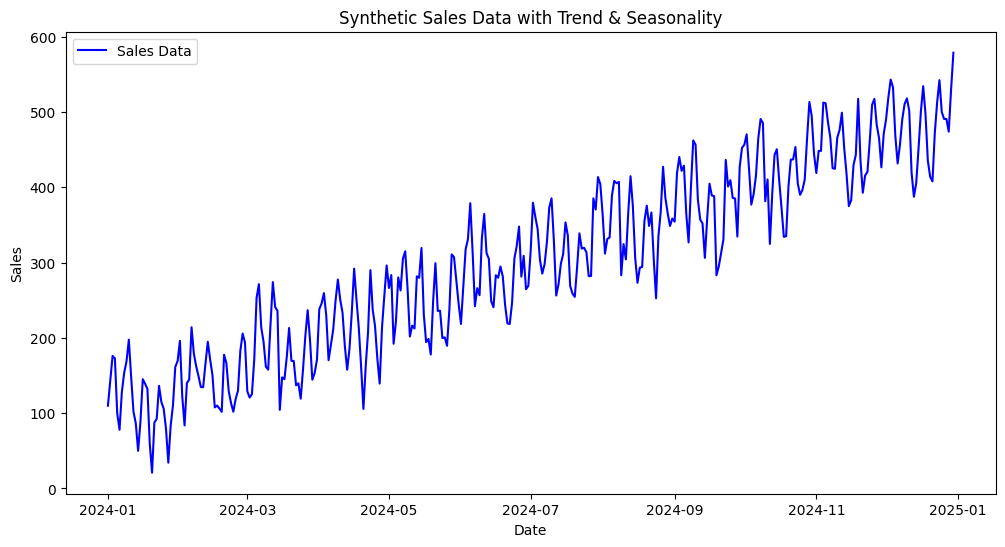

In [87]:
# Plot sales data
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Sales"], label="Sales Data", color="blue")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Synthetic Sales Data with Trend & Seasonality")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("your_timeseries_data.csv", parse_dates=["Date"], index_col="Date")

# Normalize data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Using past 10 days for prediction
X, y = create_sequences(df_scaled, seq_length)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=50, batch_size=16)

# Make predictions
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)


When to use LSTMs?
- When your time series data has long-term dependencies.
- When classical models fail to capture patterns.
___
### 4. Gated Recurrent Units (GRUs) – Faster than LSTMs!

🔹 GRUs vs LSTMs:
- GRUs are like LSTMs but have only two gates (Update & Reset) → Faster training.
- Best for small datasets where LSTMs might overfit.

🔹 Python Example – GRU Model

In [ ]:
from tensorflow.keras.layers import GRU

model = Sequential([
    GRU(50, return_sequences=True, input_shape=(seq_length, 1)),
    GRU(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=50, batch_size=16)


When to use GRUs?
- When training speed is important.
- When dataset is small and LSTMs are overfitting.
___
### 5. Transformers for Time Series Forecasting

Why Transformers?
- Self-Attention Mechanism → Learn dependencies at any time step.
- Parallel Computation → Faster than LSTMs.
- Used in Google’s Time Series Forecasting (TFT).

🔹 Python Example – Transformer for Time Series

In [ ]:
from tensorflow.keras.layers import MultiHeadAttention

# Transformer-based Time Series Model (simplified)
class TransformerModel(tf.keras.Model):
    def __init__(self, num_heads, d_model):
        super().__init__()
        self.attention = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.dense = Dense(1)

    def call(self, inputs):
        x = self.attention(inputs, inputs)
        return self.dense(x)

model = TransformerModel(num_heads=4, d_model=64)
model.compile(optimizer='adam', loss='mean_squared_error')

When to use Transformers?
- When working with very large time series datasets.
- When forecasting requires long-term dependencies.
___
Common Mistakes to Avoid
- Using LSTMs/GRUs for small datasets → Use ARIMA instead!
- Not normalizing data → LSTMs/GRUs need scaling.
- Ignoring feature engineering → Transformers work better with added features.

___
## 🟢 Stage 6: Real-World Applications & Model Deployment
### 1. Real-World Use Cases of Time Series Analysis
🔹 Finance & Stock Market
- Stock Price Prediction – Using LSTMs to forecast prices based on historical data.
- Risk Management – Identifying trends in financial markets.

🔹 Example:
- JP Morgan & Goldman Sachs use Time Series Models for stock price forecasting and risk assessment.

🔹 Demand Forecasting in Retail
- Sales Forecasting – Predicting future demand using SARIMA & LSTMs.
- Inventory Management – Preventing overstock/understock issues.

🔹 Example:
- Amazon & Walmart use time series forecasting to predict customer demand.

🔹 Healthcare
- Disease Outbreak Prediction – Forecasting epidemics using time series models.
- Patient Monitoring – Predicting patient vitals using LSTMs.

🔹 Example:
- WHO & CDC use time series models to track COVID-19 trends.

🔹 Energy Sector
- Electricity Demand Forecasting – Predicting power consumption using ARIMA.
- Renewable Energy Forecasting – Predicting solar and wind energy availability.

🔹 Example:
- Tesla & Siemens use deep learning for energy demand forecasting.
___
### 2. End-to-End Model Deployment (Flask + Streamlit + Cloud)
Once we build a forecasting model, we need to deploy it!

🔹 Steps to Deploy a Time Series Model:
1. Train the Model (ARIMA, LSTM, or Transformer).
2. Save the Model (Pickle for ML, H5 for Deep Learning).
3. Build a Flask or Streamlit API for real-time predictions.
4. Deploy on Cloud (AWS, GCP, Azure).

In [ ]:
import pickle

# Save ARIMA model
with open("arima_model.pkl", "wb") as f:
    pickle.dump(model_fit, f)

# Load ARIMA model
with open("arima_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Make Predictions
forecast = loaded_model.forecast(steps=12)
print(forecast)


🔹 Deploying a Time Series Model with Flask

✅ Run this script and test via Postman!

In [ ]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load model
with open("arima_model.pkl", "rb") as f:
    model = pickle.load(f)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json["steps"]
    forecast = model.forecast(steps=int(data))
    return jsonify(forecast.tolist())

if __name__ == '__main__':
    app.run(debug=True)


🔹 Deploying a Time Series Dashboard with Streamlit

In [ ]:
import streamlit as st
import pickle

# Load model
with open("arima_model.pkl", "rb") as f:
    model = pickle.load(f)

st.title("Time Series Forecasting App")

steps = st.number_input("Enter Number of Future Steps:", min_value=1, max_value=100, value=12)
if st.button("Predict"):
    forecast = model.forecast(steps=steps)
    st.line_chart(forecast)

✅ Run this using:

`streamlit run app.py`
___
### 3. MLOps for Time Series Forecasting
MLOps (Machine Learning Operations) helps automate, monitor, and scale time series models.

Best Practices for Time Series MLOps:
- Automated Model Retraining – Using Airflow to refresh predictions.
- CI/CD Pipelines – Using GitHub Actions to deploy updated models.
- Monitoring Model Drift – Checking if new data affects performance.

Common Mistakes to Avoid
-Deploying models without monitoring performance.
- Not updating models with new data (retraining is essential).
- Ignoring cloud deployment for scalability.

# Time Series Data

Observations collected over a sequence of time intervals.

## Key Characteristics of Time Series Data

1. Chronological order: Regular intervals
2. Sequential data: Current observations depend on past values
3. Temporal components: Trend, Seasonality, Cyclic trend, Noise
4. Constant frequency: Continuous data without any missing values
5. Dynamic nature: Affected by external factors

## Goals of Time Series Analysis

It is a technique to draw meaningful insights from patterns and trends.

# Time Series Decomposition

1. Trend (T): Long term upward/downward movement.
2. Seasonality (S): Repeating pattern over an interval of time
3. Cyclic pattern (C): Long term fluctuations
- **Economic Cycle**:
- **Business Cycle**:

4. Residuals (R): Unexpected fluctuations

## Types of Decomposition models

Additive model: $Y_t = T_t + S_t + R_t$
-
Multiplicative model: $Y_t = T_t$ x $S_t$ x $R_t$
-

In [146]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = yf.download('AAPL', start = '2024-01-01', end = '2025-12-31', multi_level_index = False)

data.to_csv('AAPL.csv')

In [147]:
data = pd.read_csv('AAPL.csv')

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

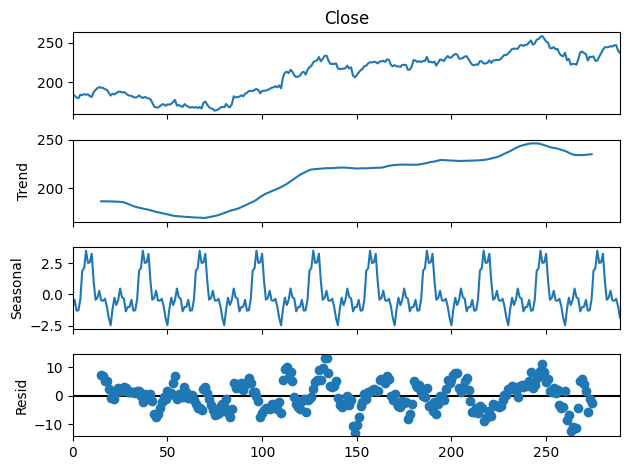

In [9]:
fig = seasonal_decompose(data['Close'], model = 'additive', period = 30).plot()
# Tight layout to realign things
fig.tight_layout()
plt.show()

## STL (Seasonal and Trend) Decomposition (using LoESS

LoESS - Locally Estimated Scatterplot Smoothening
- Handle outliers in Time Series data

**Classical Method**
1. Easily influenced by outliers
2. Can handle both additive and multiplicative models

**LoESS Method**
1. Handles outliers
2. Only handles Additive models

In [9]:
from statsmodels.tsa.seasonal import STL

In [10]:
stl = STL(data['Close'], period = 30)

In [11]:
result = stl.fit()

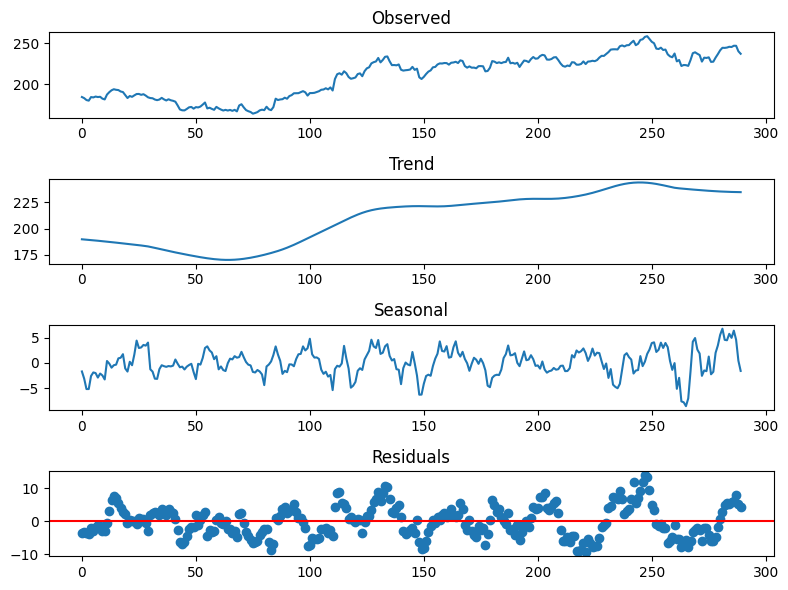

In [12]:
fig, ax = plt.subplots(4, 1,figsize = (8, 6))
ax = ax.flatten()

ax[0].plot(result.observed, label = 'Observed')
ax[0].set_title('Observed')

ax[1].plot(result.trend, label = 'Trend')
ax[1].set_title('Trend')

ax[2].plot(result.seasonal, label = 'Seasonal')
ax[2].set_title('Seasonal')

ax[3].scatter(y = result.resid, x = data.index, label = 'Residuals')
ax[3].axhline(result.resid.mean(), c = 'r')
ax[3].set_title('Residuals')

fig.tight_layout()
fig.show()

# Stationarity
- Constant mean (no trend/seasonality)
- Constant variance
- Constant autocorrelation

## Why do we need stationarity
Stationary data helps in future forecasting.

## Types of stationarity
**Weak stationarity**:
1. Constant mean
2. Constant variance
3. Constant autocorrelation

**Strict stationarity**:
1. Exhibits of weak stationarity
2. Joint distribution remains unchanged when shifted along any time period 

## Testing for weak stationarity
**Augmented Dickey Fuller (ADF) Test**: Checks if any unit root (non-stationary trend) is present or not.
- $H_0$ : Data has unit root
- $H_1$ : Data does not have unit root
If p-value < 0.05 : data is stationary

**Kwiatkowski-Philips-Schmidt-Shin (KPSS) Test**: Fits a constant mean model on the data
- $H_0$ : Data is stationary
- $H_1$ : Data is non-stationary
If p-value < 0.05 : data is stationary

## Testing for strict stationarity
**Kolmogorov-Smirnov (KS) Test**: Compares cumulative distribution function of two functions

In [13]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(data['Close'])

print(f'ADF Statistics: {adf[0]}')
print(f'ADF p-value: {adf[1]}')
print('Critical Values')
for i, j in adf[4].items():
    print(f'{i}: {j}')

# Since the p-value > 0.05 -> the data is non-stationary

ADF Statistics: -0.9788004022613276
ADF p-value: 0.7609176314277395
Critical Values
1%: -3.4531816058796143
5%: -2.871593390724642
10%: -2.5721268156511536


In [14]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(data['Close'], regression = 'ct')

print(f'KPSS statistics: {kpss_test[0]}')
print(f'KPSS p-value: {kpss_test[1]}')
for i, j in kpss_test[3].items():
    print(f'{i}: {j}')

KPSS statistics: 0.1999208184716462
KPSS p-value: 0.016029693073132678
10%: 0.119
5%: 0.146
2.5%: 0.176
1%: 0.216


In [15]:
from scipy.stats import ks_2samp

In [16]:
ks = ks_2samp(data['Close'].iloc[:145], data['Close'].iloc[145:])
print(f'KS Statistic: {np.round(ks[0], 4)}')
print(f'KS p-value: {np.round(ks[1], 4)}')

KS Statistic: 0.8345
KS p-value: 0.0


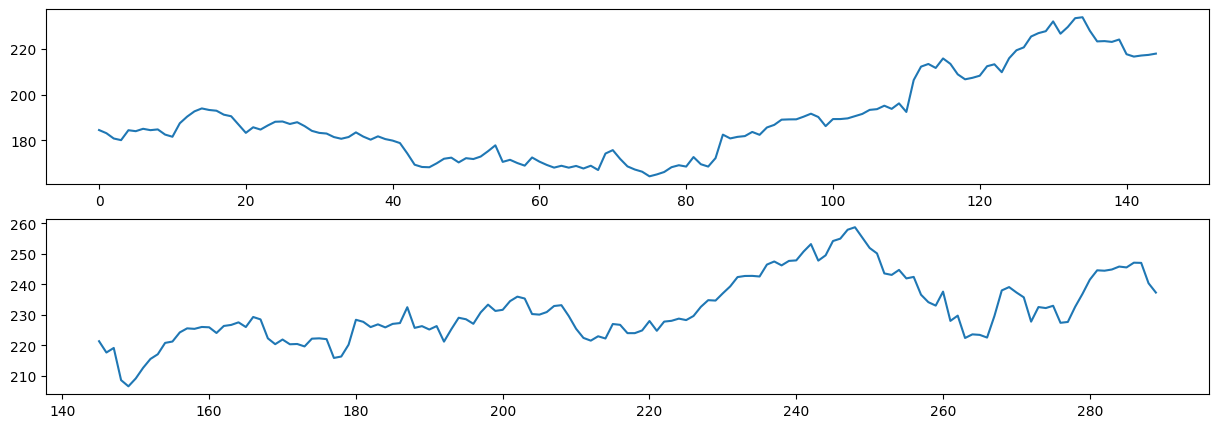

In [17]:
plt.figure(figsize = (15, 5))

plt.subplot(211)
plt.plot(data['Close'].iloc[:145])

plt.subplot(212)
plt.plot(data['Close'].iloc[145:])

plt.show()

## Making a Time Series stationary
**Differencing**
- **First Order**: $x'_i = x_i - x_{i-1}$
- **Second Order**: $x''_i = x'_i - x'_{i-1}$

**Transformation**: Stabilizes the variance in time series data
- **Logarithmic**: $\log{x_i}$ OR $\log{x_{i-1}}$
- **Power**: $\sqrt{x_i}$ OR $\sqrt{x_{i-1}}$
- **Box-Cox**: Combination of power and log transformation

**Detrending**: Removing trend component in Time Series data
- **Linear Detrending**: Fitting a regression line to a time series data and subtracting the difference.
- **Moving Average Detrending**: Smoothening out fluctuations in data by choosing an approproate window size.

**Seasonal Adjustment**: Removing seasonal component using Classical Decomposition or STL Decomposition.

## Choosing the right method

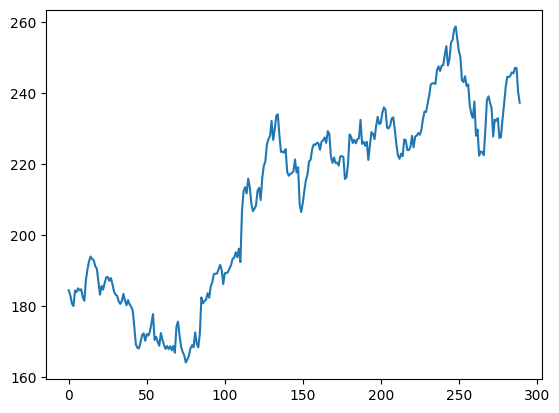

In [18]:
plt.plot(data['Close'])
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(data['Close'])

print(f'ADF Statistics: {adf[0]}')
print(f'ADF p-value: {adf[1]}')

ADF Statistics: -0.9788004022613276
ADF p-value: 0.7609176314277395


### Differencing

In [21]:
adf_fod = adfuller(data['Close'].diff().dropna())

print(f'ADF Statistics (FOD): {adf_fod[0]}')
print(f'ADF p-value (FOD): {np.round(adf_fod[1], 4)}')
print('Critical Values')
for i, j in adf_fod[4].items():
    print(i, ':', np.round(j, 2))

adf_sod = adfuller(data['Close'].diff().diff().dropna())

print(f'\nADF Statistics (SOD): {adf_sod[0]}')
print(f'ADF p-value (SOD): {np.round(adf_sod[1], 4)}')
print('Critical Values')
for i, j in adf_sod[4].items():
    print(i, ':', np.round(j, 2))

ADF Statistics (FOD): -15.830660182835913
ADF p-value (FOD): 0.0
Critical Values
1% : -3.45
5% : -2.87
10% : -2.57

ADF Statistics (SOD): -8.753052873748187
ADF p-value (SOD): 0.0
Critical Values
1% : -3.45
5% : -2.87
10% : -2.57


### Transformation

In [22]:
adf_log = adfuller(np.log(data['Close']))

print(f'ADF Statistics (log): {adf_log[0]}')
print(f'ADF p-value (log): {np.round(adf_log[1], 4)}')
print('Critical Values')
for i, j in adf_log[4].items():
    print(i, ':', np.round(j, 2))

ADF Statistics (log): -0.953976506621367
ADF p-value (log): 0.7697
Critical Values
1% : -3.45
5% : -2.87
10% : -2.57


In [23]:
adf_power = adfuller(np.sqrt(data["Close"]))

print(f'ADF Statistics (power): {adf_power[0]}')
print(f'ADF p-value (power): {np.round(adf_power[1], 4)}')
print('Critical Values')
for i, j in adf_power[4].items():
    print(i, ':', np.round(j, 2))

ADF Statistics (power): -0.9644435828791726
ADF p-value (power): 0.766
Critical Values
1% : -3.45
5% : -2.87
10% : -2.57


In [24]:
from scipy import stats

adf_box_cox = adfuller(stats.boxcox(data[data['Close'] > 0]['Close'])[0])

print(f'ADF Statistics (power): {adf_box_cox[0]}')
print(f'ADF p-value (power): {np.round(adf_box_cox[1], 4)}')
print('Critical Values')
for i, j in adf_box_cox[4].items():
    print(i, ':', np.round(j, 2))

ADF Statistics (power): -1.022571115677193
ADF p-value (power): 0.7449
Critical Values
1% : -3.45
5% : -2.87
10% : -2.57


### Detrending

In [34]:
from scipy import signal

trend = np.polyfit(np.arange(len(data['Close'])), data['Close'], 1)
trendline = np.polyval(trend, np.arange(len(data['Close'])))
detrended_line = data['Close'] - trendline

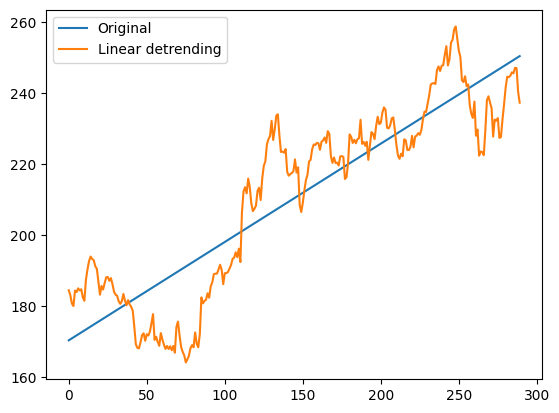

In [44]:
plt.plot(np.arange(len(data['Close'])), trendline, label = 'Original')
plt.plot(np.arange(len(data['Close'])), data['Close'], label = 'Linear detrending')
plt.legend()
plt.show()

In [39]:
adf_lr = adfuller(detrended_line)

print(f'ADF Statistics (power): {adf_lr[0]}')
print(f'ADF p-value (power): {np.round(adf_lr[1], 4)}')
print('Critical Values')
for i, j in adf_lr[4].items():
    print(i, ':', np.round(j, 2))

ADF Statistics (power): -2.216792221651877
ADF p-value (power): 0.2002
Critical Values
1% : -3.45
5% : -2.87
10% : -2.57


In [48]:
data['MA'] = data['Close'].rolling(window = 30).mean()

In [60]:
adf_ma = adfuller(data['MA'].dropna())

print(f'ADF Statistics (power): {adf_ma[0]}')
print(f'ADF p-value (power): {np.round(adf_ma[1], 4)}')
print('Critical Values')
for i, j in adf_ma[4].items():
    print(i, ':', np.round(j, 2))

ADF Statistics (power): -1.3608653778092317
ADF p-value (power): 0.6009
Critical Values
1% : -3.46
5% : -2.87
10% : -2.57


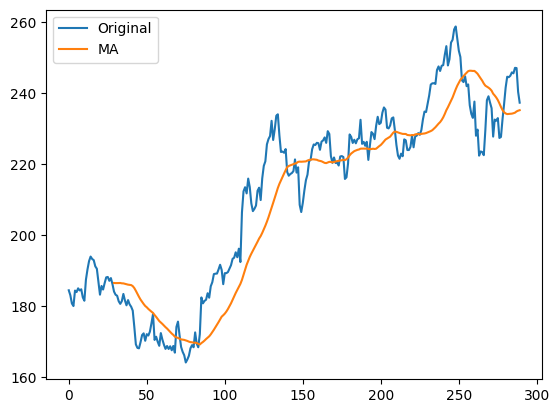

In [50]:
plt.plot(data['Close'], label = 'Original')
plt.plot(data['MA'], label = 'MA')
plt.legend(loc = 'upper left')
plt.show()

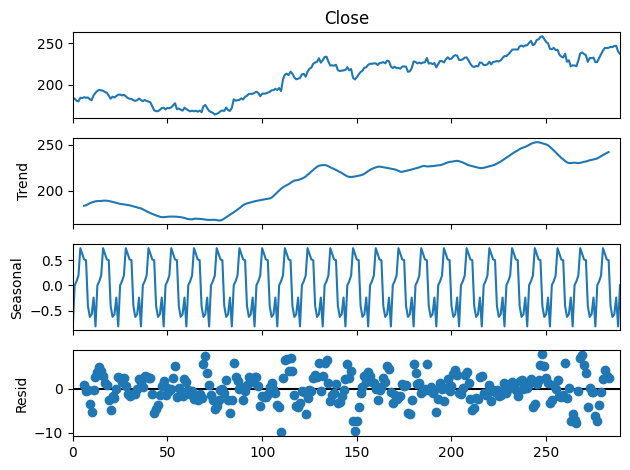

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

sd = seasonal_decompose(data['Close'], period = 12)
sd.plot()
plt.show()


In [63]:
adf_sd = adfuller(data['Close']/sd.seasonal)

print(f'ADF Statistics (power): {adf_sd[0]}')
print(f'ADF p-value (power): {np.round(adf_sd[1], 4)}')
print('Critical Values')
for i, j in adf_sd[4].items():
    print(i, ':', np.round(j, 2))

ADF Statistics (power): -0.9607220133772829
ADF p-value (power): 0.7673
Critical Values
1% : -3.45
5% : -2.87
10% : -2.57


# White Noise and Random Walk
## White Noise
1. Data with no pattern, trend or seasonality.
2. Data is completely random.

**Characteristics**: 
1. Constant mean
2. Constant variance
3. no autocorrelation

## Random Walk
1. Is a cumulative pattern.
2. Data is highly correlated with past values.

$y_t = y_{t-1} + e_t$
-
**Characteristics**
1. Predictable
2. Mean and variance changes over time
3. First difference is stationary.

## Identifying White Noise and Random Walk
1. Visual plot
2. ACF and PACF
3. Ljung Box test: To check autocorrelation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

In [2]:
# Generating white noise and random walk for comparison
np.random.seed(42)

white_noise = np.random.normal(0, 1, 1000)
random_walk = np.cumsum(np.random.normal(0, 1, 1000))

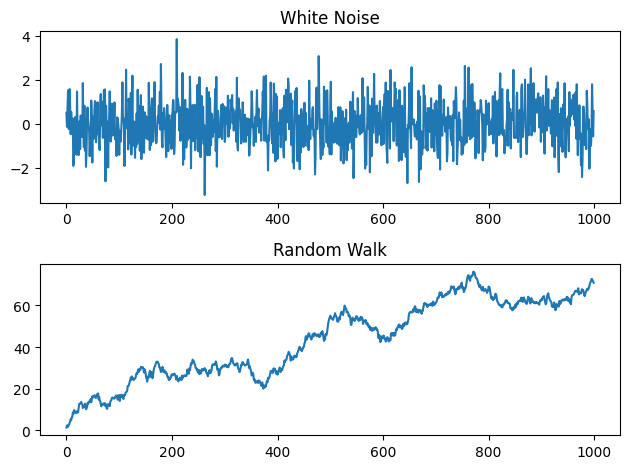

In [3]:
plt.subplot(2, 1, 1)
plt.plot(white_noise)
plt.title('White Noise')

plt.subplot(2, 1, 2)
plt.plot(random_walk)
plt.title('Random Walk')

plt.tight_layout()
plt.show()

In [4]:
jb_wn = acorr_ljungbox(white_noise, lags = 10)
jb_wn

,lb_stat,lb_pvalue
1,0.056085,0.812794
2,0.056139,0.972321
3,0.318984,0.956419
4,3.277853,0.512449
5,3.949039,0.556776
6,4.155995,0.655575
7,4.307473,0.743759
8,6.739585,0.564972
9,7.497028,0.585516
10,7.710808,0.657061


In [5]:
jb_rw = acorr_ljungbox(random_walk, lags = 10)
jb_rw

,lb_stat,lb_pvalue
1,992.978705,6.031812e-218
2,1977.132791,0.000000e+00
3,2952.518024,0.000000e+00
4,3918.645998,0.000000e+00
5,4875.837047,0.000000e+00
6,5824.365080,0.000000e+00
7,6764.641598,0.000000e+00
8,7696.990918,0.000000e+00
9,8621.955399,0.000000e+00
10,9539.508347,0.000000e+00


# Time Series Forecasting Models
## Univariate Models
### 1. AutoRegressive(AR) Model
It assumes that the current value of a time series is a linear combination of its past values

- Used when past values strongly influence future values.
- Used When data is stationary.
- Order of AR model is denoted by p (defined by PACF).

$AR(p): y_t = C + \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \phi_p y_{t-p} + e_t$
-
- $C$ = Constant
- $\phi$ = Parameter of the model
- $y_t$ = value at time $t$
- $e_t$ = Error term
- $p$ = Order of the model

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [51]:
df = pd.read_csv('AAPL.csv')
df_ar = df[['Date', 'Close']]
df_ar['Date'] = pd.to_datetime(df_ar['Date'])
df_ar.set_index('Date', inplace = True)
df_ar.head()

,Close
Date,
2024-01-02,184.532089
2024-01-03,183.150375
2024-01-04,180.824356
2024-01-05,180.098709
2024-01-08,184.452560


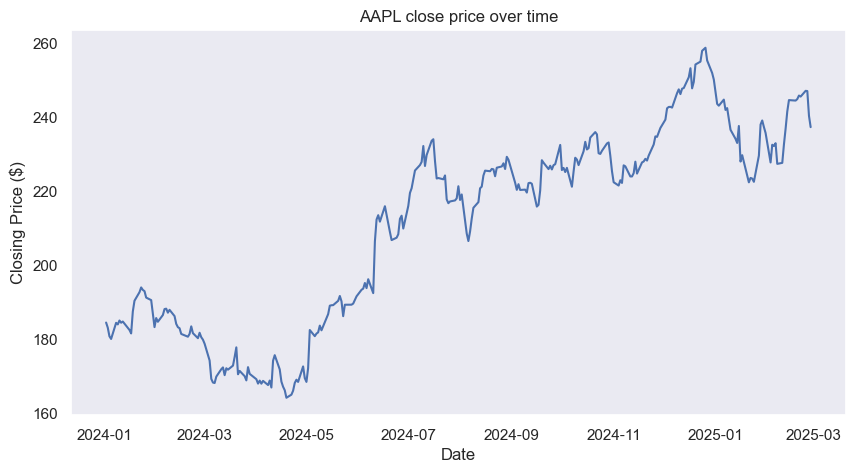

In [52]:
plt.figure(figsize = (10, 5))
plt.plot(df_ar)
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.title('AAPL close price over time')
plt.grid()
plt.show()

In [53]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df_ar)

print(f'ADF Statistics: {np.round(adf[0], 4)}')
print(f'ADF p-value: {np.round(adf[1], 4)}')

ADF Statistics: -0.9788
ADF p-value: 0.7609


In [54]:
df_ar['diff'] = df_ar.diff()
df_ar.head()

,Close,diff
Date,,
2024-01-02,184.532089,NaN
2024-01-03,183.150375,-1.381714
2024-01-04,180.824356,-2.326019
2024-01-05,180.098709,-0.725647
2024-01-08,184.452560,4.353851


In [55]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df_ar['diff'].dropna())

print(f'ADF Statistics: {np.round(adf[0], 4)}')
print(f'ADF p-value: {np.round(adf[1], 4)}')

ADF Statistics: -15.8307
ADF p-value: 0.0


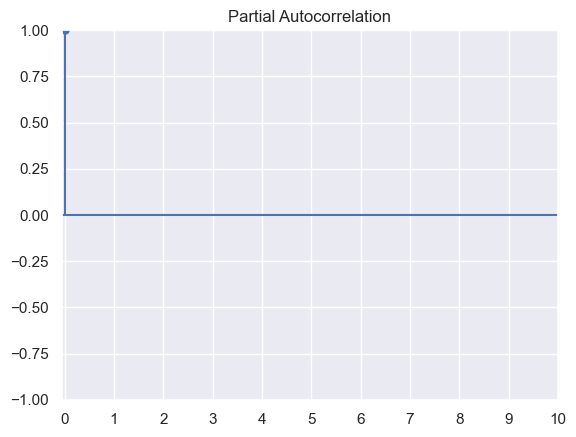

In [56]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_ar['diff'], lags = 10)
plt.xticks(np.arange(0, 11, 1))
plt.show()

In [86]:
train_size = int(len(df_ar)* 0.8)
train, test = df_ar['diff'].dropna()[:train_size], df_ar['diff'].dropna()[train_size:]

In [87]:
from statsmodels.tsa.ar_model import AutoReg

ar = AutoReg(train, lags = 2).fit()

ar_pred = ar.predict(start = len(train), end = len(train) + len(test) - 1)

In [88]:
pred_close = df_ar['Close'].iloc[train_size] + ar_pred.cumsum()

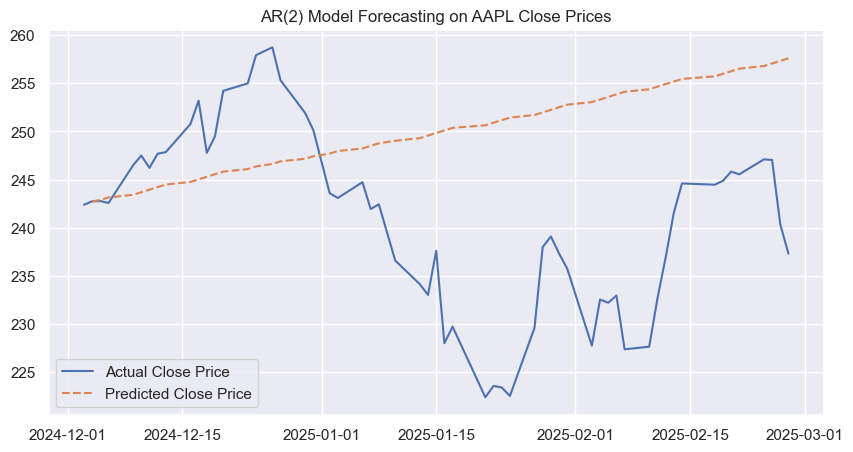

In [98]:
plt.figure(figsize=(10,5))
plt.plot(df_ar.index[train_size:], df_ar['Close'].iloc[train_size:], label="Actual Close Price")
plt.plot(df_ar.index[train_size+1:], pred_close, label="Predicted Close Price", linestyle="dashed")
plt.legend()
plt.title("AR(2) Model Forecasting on AAPL Close Prices")
plt.show()

In [107]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(test, ar_pred)
print(f'RMSE: {np.round(rmse, 4)}')

RMSE: 3.6917


### 2. Moving Average (MA) Model
- Uses past error terms (residuals).
- Used when too much fluctuations are present.
- Order of MA model is denoted by q.

$MA(q): y_t = \epsilon_{t} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ... + \theta_q \epsilon_{t-q}$
-
- $\theta$ = Parameter of the model
- $\epsilon_t$ = Error term at $t$

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [117]:
df_ma = df[['Date', 'Close']]
df_ma.set_index('Date', inplace = True)
df_ma.head()

,Close
Date,
2024-01-02,184.532089
2024-01-03,183.150375
2024-01-04,180.824356
2024-01-05,180.098709
2024-01-08,184.452560


In [121]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df_ma['Close'])

print(f'ADF Statistics: {np.round(adf[0], 4)}')
print(f'ADF p-value: {np.round(adf[1], 4)}')

ADF Statistics: -0.9788
ADF p-value: 0.7609


In [120]:
df_ma['diff'] = df_ma.diff()

In [123]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df_ma['diff'].dropna())

print(f'ADF Statistics: {np.round(adf[0], 4)}')
print(f'ADF p-value: {np.round(adf[1], 4)}')

ADF Statistics: -15.8307
ADF p-value: 0.0


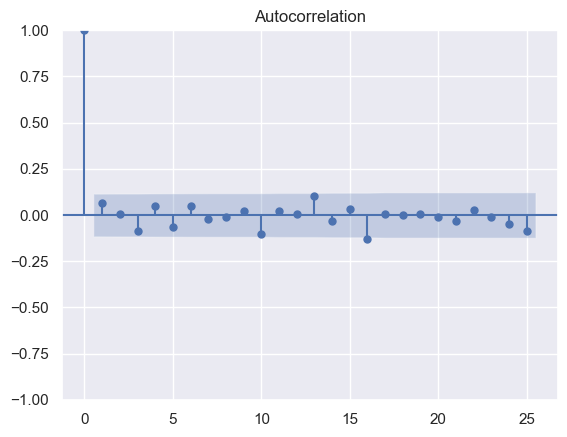

In [132]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_ma['diff'].dropna())
plt.show()

In [133]:
train_size = int(len(df_ma) * 0.8)
train, test = df_ma['diff'].dropna()[:train_size], df_ma['diff'].dropna()[train_size:]

In [143]:
from statsmodels.tsa.arima.model import ARIMA

ma = ARIMA(train, order = (0, 1, 2)).fit()

ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   diff   No. Observations:                  232
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -575.574
Date:                Tue, 04 Mar 2025   AIC                           1157.148
Time:                        10:55:13   BIC                           1167.476
Sample:                             0   HQIC                          1161.314
                                - 232                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9342      0.223     -4.185      0.000      -1.372      -0.497
ma.L2         -0.0651      0.062     -1.051      0.293      -0.186       0.056
sigma2         8.3558      1.839      4.543      0.000       4.751      11.960
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               100.19
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                             0.21
Prob(H) (two-sided):                  0.17   Kurtosis:                         6.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [141]:
ma_pred = ma.predict(start = len(train), end = len(train) + len(test) - 1)

In [142]:
len(ma_pred)

57

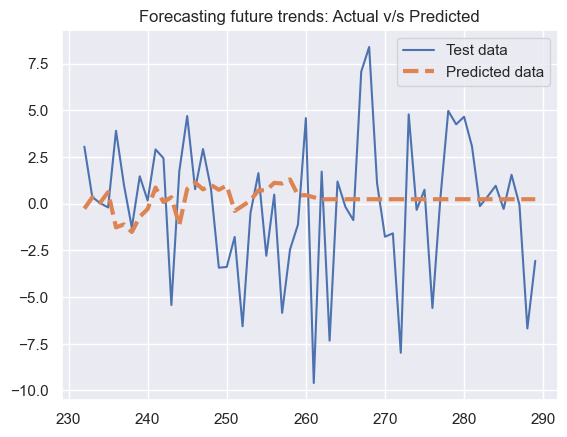

In [46]:
plt.plot(df_ma_test, label = 'Test data')
plt.plot(df_ma_test.index, ma_pred, label = 'Predicted data', linestyle = '--', linewidth = 3)
plt.title('Forecasting future trends: Actual v/s Predicted')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(df_ma_test, ma_pred)
print(f'RMSE: {np.round(rmse, 4)}')

RMSE: 3.7759


### 3. AutoRegressive Moving Average (ARMA) Model
- Combines AR and MA Model for forecasting.
- Captures both temporal dependencies and error terms.
- Used when the data is dependent on past values and too much fluctuations are present.
- Order of ARMA model is denoted by (p, q).

$ARMA(p, q): y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \phi_p y_{t-p} + e_t+ \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ... + \theta_q \epsilon_{t-q}$
-

In [49]:
df_arma = df['Close'].diff().dropna()

In [53]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df_arma)

print(f'ADF Statistics: {np.round(adf[0], 4)}')
print(f'ADF p-value: {np.round(adf[1], 4)}')

ADF Statistics: -15.8307
ADF p-value: 0.0


In [54]:
a = int(len(df_arma)* 0.8)
df_arma_train, df_arma_test = df_arma.iloc[:a], df_arma.iloc[a:]

In [67]:
from statsmodels.tsa.arima.model import ARIMA

arma = ARIMA(df_arma_train, order = (30, 0, 30))
arma_fit = arma.fit()

In [68]:
arma_pred = arma_fit.predict(start = len(df_arma_train), end = len(df_arma_train) + len(df_arma_test) - 1)

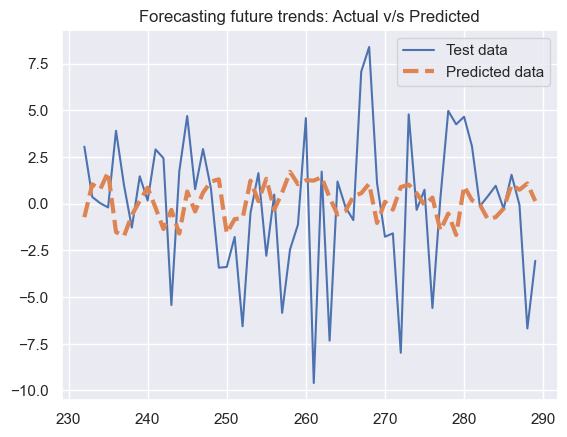

In [69]:
plt.plot(df_arma_test, label = 'Test data')
plt.plot(df_arma_test.index, arma_pred, label = 'Predicted data', linestyle = '--', linewidth = 3)
plt.title('Forecasting future trends: Actual v/s Predicted')
plt.legend()
plt.show()

In [70]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(df_arma_test, arma_pred)
print(f'RMSE: {np.round(rmse, 4)}')

RMSE: 3.9008


### 4. AutoRegressive Integrated Moving Average (ARIMA) Model
- $I$: involves differencing order
- Used when the data is dependent on past values, too much fluctuations are present and differencing has been performed.
- Order of ARMA model is denoted by (p, d, q).

$ARIMA(p, d, q): ∆y_t = \phi_1 ∆y_{t-1} + \phi_2 ∆y_{t-2} + ... + \phi_p ∆y_{t-p} + e_t+ \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ... + \theta_q \epsilon_{t-q}$
-

In [71]:
df_arima = df['Close'].diff().dropna()

In [72]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df_arima)

print(f'ADF Statistics: {np.round(adf[0], 4)}')
print(f'ADF p-value: {np.round(adf[1], 4)}')

ADF Statistics: -15.8307
ADF p-value: 0.0


In [78]:
a = int(len(df_arima)* 0.8)
df_arima_train, df_arima_test = df_arima.iloc[:a], df_arima.iloc[a:]

In [75]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(df_arima_train, order = (30, 1, 30))
arima_fit = arima.fit()

In [76]:
arima_pred = arima_fit.predict(start = len(df_arima_train), end = len(df_arima_train) + len(df_airma_test) - 1)

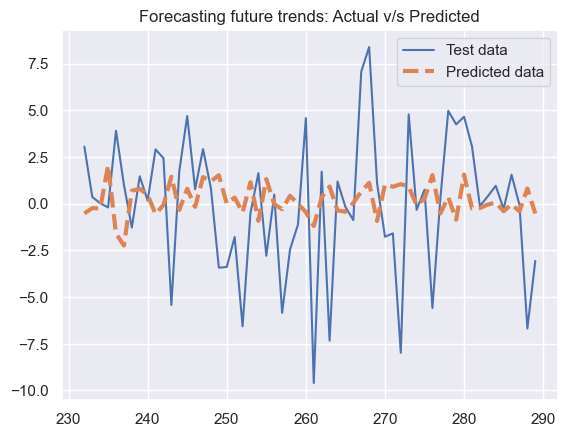

In [79]:
plt.plot(df_arima_test, label = 'Test data')
plt.plot(df_arima_test.index, arima_pred, label = 'Predicted data', linestyle = '--', linewidth = 3)
plt.title('Forecasting future trends: Actual v/s Predicted')
plt.legend()
plt.show()

In [96]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(df_arima_test, arima_pred)
print(f'RMSE: {np.round(rmse, 4)}')

RMSE: 3.8508


### 5. Seasonal AutoRegressive Integrated Moving Average (SARIMA) Model
- Used when the data is dependent on past values, too much fluctuations are present, differencing has been performed and Seasonal data is present.
- Order of SARIMA Model is denoted by $(p, d, q)$ x $(P, D, Q, m)$
> - $(p, d, q)$ : ARIMA Model
> - $(P, D, Q)$ : Seasonal part
> - $m$ : Period

$$
-

In [85]:
df_sarima = df['Close'].diff().dropna()

In [86]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df_sarima)

print(f'ADF Statistics: {np.round(adf[0], 4)}')
print(f'ADF p-value: {np.round(adf[1], 4)}')

ADF Statistics: -15.8307
ADF p-value: 0.0


In [87]:
a = int(len(df_sarima)* 0.8)
df_sarima_train, df_sarima_test = df_sarima.iloc[:a], df_sarima.iloc[a:]

In [91]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(df_sarima_train, order = (7, 1, 7), seasonal_order = (1, 1, 1, 45))
sarima_fit = sarima.fit()

In [92]:
sarima_pred = sarima_fit.predict(start = len(df_sarima_train), end = len(df_sarima_train) + len(df_sarima_test) - 1)

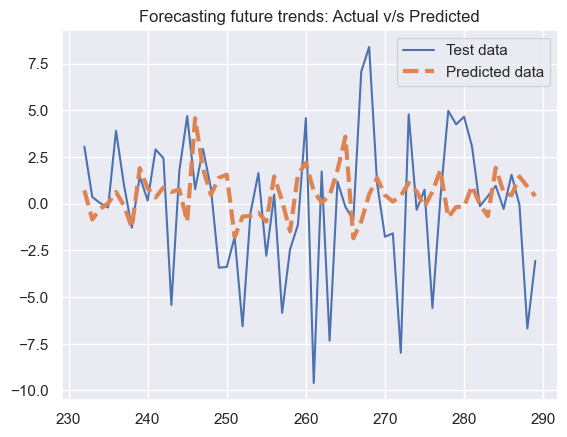

In [93]:
plt.plot(df_sarima_test, label = 'Test data')
plt.plot(df_sarima_test.index, sarima_pred, label = 'Predicted data', linestyle = '--', linewidth = 3)
plt.title('Forecasting future trends: Actual v/s Predicted')
plt.legend()
plt.show()

In [97]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(df_sarima_test, sarima_pred)
print(f'RMSE: {np.round(rmse, 4)}')

RMSE: 3.8422


## Granger Caulity Test
Checks if one time series can predict another time series

In [125]:
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Close,High,Low,Open,Volume
0,2024-01-02,184.532089,187.315382,182.792533,186.033072,82488700
1,2024-01-03,183.150375,184.770652,182.335262,183.120556,58414500
2,2024-01-04,180.824356,181.997307,179.800504,181.062914,71983600
3,2024-01-05,180.098709,181.669281,179.094742,180.903888,62303300
4,2024-01-08,184.452560,184.492330,180.416793,181.003268,59144500


In [138]:
from statsmodels.tsa.stattools import grangercausalitytests

gct = grangercausalitytests(df[['Close', 'Open']], maxlag = 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5717  , p=0.1099  , df_denom=286, df_num=1
ssr based chi2 test:   chi2=2.5987  , p=0.1070  , df=1
likelihood ratio test: chi2=2.5871  , p=0.1077  , df=1
parameter F test:         F=2.5717  , p=0.1099  , df_denom=286, df_num=1


## Multivariate Models 

In [75]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = yf.download('TSLA', start = '2024-01-01', end = '2025-12-31', multi_level_index = False)

In [ ]:
data.to_csv('TSLA.csv')

### 1. Vector AutoRegressive (VAR) Model
Captures the interdependencies between multiple variables.

Used when:
- You have multiple time series variables influencing each other.
- There is a need to capture both past and present interactions between variables.
- The time series is stationary (or can be made stationary).

**Formula**

For a **VAR(p)** model with three time series variables $(X, Y)$

$X_t = c_1 + a_{11}X_{t-1} + a_{12}Y_{t-1} + a_{13}X_{t-2} + a_{14}Y_{t-2} + ... + e_{1, t}$
-
$Y_t = c_2 + a_{21}X_{t-1} + a_{22}Y_{t-1} + a_{23}X_{t-2} + a_{24}Y_{t-2} + ... + e_{2, t}$
-
- $X_t, Y_t$ : value of $X, Y$ at $t$.
- $c_1, c_2$ : are constants (intercepts).
- $a_{i,j}$ : are coefficients showing the influence of past values.
- $e_{1, t}, e_{2, t}$ : are error terms (white noise).

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tools.eval_measures import rmse

In [171]:
tesla = pd.read_csv('TSLA.csv', usecols = ['Date', 'Close'])
apple = pd.read_csv('AAPL.csv', usecols = ['Date', 'Close'])

df = pd.DataFrame()
df['Date'] = tesla['Date']
df['TSLA_Close'] = tesla['Close']
df['AAPL_Close'] = apple['Close']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.head()

,TSLA_Close,AAPL_Close
Date,,
2024-01-02,248.419998,184.532089
2024-01-03,238.449997,183.150375
2024-01-04,237.929993,180.824356
2024-01-05,237.490005,180.098709
2024-01-08,240.449997,184.452560


In [177]:
# Function to perform ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("Conclusion: The series is stationary (Reject H0).")
    else:
        print("Conclusion: The series is non-stationary (Fail to reject H0).")

# Apply ADF test on both time series
print("ADF Test for TSLA_Close:")
adf_test(df["TSLA_Close"])

print("\nADF Test for AAPL_Close:")
adf_test(df["AAPL_Close"])


ADF Test for TSLA_Close:
ADF Statistic: -1.0085087827947763
p-value: 0.7501482809179991
Conclusion: The series is non-stationary (Fail to reject H0).

ADF Test for AAPL_Close:
ADF Statistic: nan
p-value: nan
Conclusion: The series is non-stationary (Fail to reject H0).


In [173]:
for col in df.columns:
    adf = adfuller(df[col].dropna())
    print(f'ADF Statistics for {col}: {np.round(adf[0], 4)}')
    print(f'ADF p-value for {col}: {np.round(adf[1], 4)}\n')

ADF Statistics for TSLA_Close: -1.0085
ADF p-value for TSLA_Close: 0.7501

ADF Statistics for AAPL_Close: -0.9788
ADF p-value for AAPL_Close: 0.7609



In [130]:
df = df.diff().dropna()
df.head()

,TSLA_Close,AAPL_Close
Date,,
2024-01-03,-9.970001,-1.381714
2024-01-04,-0.520004,-2.326019
2024-01-05,-0.439987,-0.725647
2024-01-08,2.959991,4.353851
2024-01-09,-5.489990,-0.417496


In [149]:
for col in df.columns:
    adf = adfuller(df[col].dropna())
    print(f'ADF Statistics for {col}: {np.round(adf[0], 4)}')
    print(f'ADF p-value for {col}: {np.round(adf[1], 4)}\n')

ADF Statistics for TSLA_Close: -16.3183
ADF p-value for TSLA_Close: 0.0

ADF Statistics for AAPL_Close: -15.8307
ADF p-value for AAPL_Close: 0.0



In [150]:
gct = grangercausalitytests(df[['AAPL_Close', 'TSLA_Close']].dropna(), maxlag = 15)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0180  , p=0.8934  , df_denom=285, df_num=1
ssr based chi2 test:   chi2=0.0182  , p=0.8928  , df=1
likelihood ratio test: chi2=0.0182  , p=0.8928  , df=1
parameter F test:         F=0.0180  , p=0.8934  , df_denom=285, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0415  , p=0.9594  , df_denom=282, df_num=2
ssr based chi2 test:   chi2=0.0845  , p=0.9587  , df=2
likelihood ratio test: chi2=0.0844  , p=0.9587  , df=2
parameter F test:         F=0.0415  , p=0.9594  , df_denom=282, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0652  , p=0.9783  , df_denom=279, df_num=3
ssr based chi2 test:   chi2=0.2005  , p=0.9775  , df=3
likelihood ratio test: chi2=0.2004  , p=0.9775  , df=3
parameter F test:         F=0.0652  , p=0.9783  , df_denom=279, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.0956  , p=0.9838  

In [160]:
VAR(df).select_order(maxlags = 10).aic

np.int64(0)

In [145]:
from statsmodels.tsa.api import VAR, VARMAX

var = VAR(df)
lag_selection = var.select_order(maxlags = 10)
lag_selection.summary()

,AIC,BIC,FPE,HQIC
0,6.893*,6.919*,985.0*,6.903*
1,6.914,6.992,1006.,6.945
2,6.933,7.064,1026.,6.986
3,6.951,7.133,1044.,7.024
4,6.971,7.205,1065.,7.065
5,6.983,7.269,1078.,7.097
6,6.997,7.336,1094.,7.133
7,6.995,7.385,1091.,7.151
8,7.016,7.459,1115.,7.194
9,7.022,7.516,1121.,7.220


In [147]:
a = int(len(df) * 0.8)
train, test = df.iloc[:a], df.iloc[a:]

In [148]:
var_fit = var.fit(lag_selection.aic)
var_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 02, Mar, 2025
Time:                     15:34:38
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    6.86903
Nobs:                     289.000    HQIC:                   6.85382
Log likelihood:          -1807.05    FPE:                    937.912
AIC:                      6.84366    Det(Omega_mle):         931.455
--------------------------------------------------------------------
Results for equation TSLA_Close
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.116021         0.620028            0.187           0.852

Results for equation AAPL_Close
           coefficient       std. error           t-stat            prob
------------------------------------------------------

In [157]:
var_pred = var_fit.forecast(train.values[-lag_selection.aic:], steps = len(test))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [102]:
from statsmodels.tsa.api import VAR, VARMAX

var = VAR(train[['AAPL_Close', 'TSLA_Close']])
var_fit = var.fit(maxlags = 7)

var_pred = var_fit.forecast(train.values[var_fit.k_ar], steps = len(test))

ValueError: y must by have at least order (7) observations. Got 2.

In [91]:
var_pred = pd.DataFrame(var_pred, index = test.index, columns = test.columns)

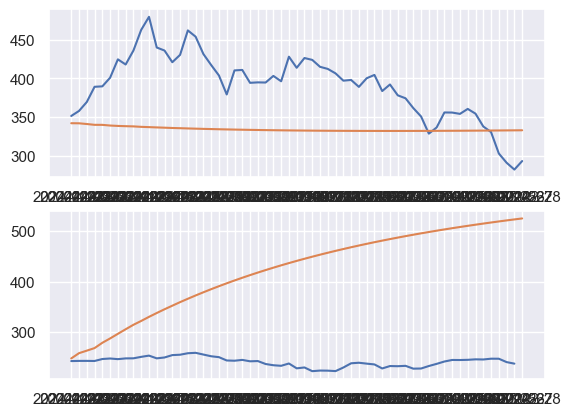

In [93]:
plt.subplot(2, 1, 1)
plt.plot(test['TSLA_Close'], label ='')
plt.plot(var_pred['TSLA_Close'])

plt.subplot(2, 1, 2)
plt.plot(test['AAPL_Close'])
plt.plot(var_pred['AAPL_Close'])

### 2. Vector Moving Average (VMA) Model

### 3. Vector AutoRegressive Moving Average (VARMA) Model

### 4. Vector AutoRegressive Integrated Moving Average (VARIMA) Model

# Smoothing Methods

## Importance of Smoothing
Smoothing is used to smoothen out the fluctuations
- Noise Reduction.
- Good for forecasting high fluctuated data.
- Trend identification.

## Types of Smoothing
### Moving Average (MA)
1. **Simple Moving Average (SMA)**: Equal weight to all values in the window.

$SMA_t = \frac{1}{n}\sum_{i = 0}^{n - 1} x_{t - i}$
-
- $SMA_t$: Moving Average at time t
- $x_{t - i}$: Value at time $t-i$
- $n$: Window size (number of past observations used)

Example:

`Data: [10, 20, 30, 40, 50]`

`Window = 3`

`SMA(3) = [(10+20+30)/3, (20+30+40)/3, (30+40+50)/3]`
 
`Result = [Nan, Nan, 20, 30, 40]`

2. **Exponential Moving Average (EMA)**: Assigns more weight to recent data using an exponential decay factor.

$EMA_t = \alpha.x_t + (1-\alpha).EMA_{t-1}$
-
- $\alpha$: smoothing factor $(\alpha = \frac{2}{n+1})$

3. **Weighted Moving Average (WMA)**: Assigns different weights to observations (more recent data gets higher weight).

$WMA_t = \frac{\sum_{i = 1}^{n} w_i x_{t - i + 1}}{\sum_{i = 1}^{n - 1} w_i}$
-

4. **Cumulative Moving Average (CMA)**: Includes all past data points in the average

$CMA_t = \frac{1}{t}\sum_{i = 1}^{t} x_i$
-

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('AAPL.csv', usecols = ['Date', 'Close'])
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.head()

,Close
Date,
2024-01-02,184.532089
2024-01-03,183.150375
2024-01-04,180.824356
2024-01-05,180.098709
2024-01-08,184.452560


In [47]:
# Simple Moving Average
df['SMA'] = df['Close'].rolling(window = 15).mean()

In [59]:
# Exponential Moving Average
df['EMA'] = df['Close'].ewm(span = 20).mean()

In [54]:
# Weighted Moving Average
weights = np.arange(1, 15+1)
df['WMA'] = df['Close'].rolling(window = 15).apply(lambda prices: np.dot(prices, weights)/weights.sum())

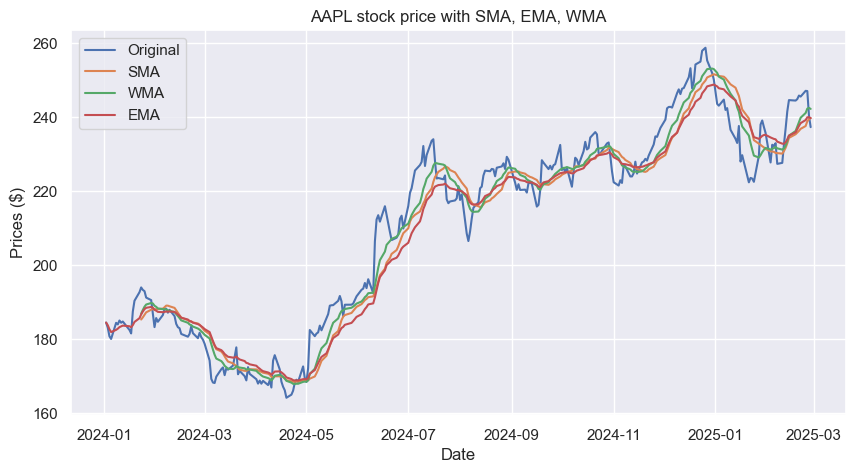

In [64]:
plt.figure(figsize = (10, 5))
plt.plot(df['Close'], label = 'Original')
plt.plot(df['SMA'], label = 'SMA')
plt.plot(df['WMA'], label = 'WMA')
plt.plot(df['EMA'], label = 'EMA')
plt.xlabel('Date')
plt.ylabel('Prices ($)')
plt.title('AAPL stock price with SMA, EMA, WMA')
plt.legend()
plt.show()

### Exponential Smoothing (ES)
- Selecting Alpha $(\alpha)$
> - High $\alpha$ : More weight to recent observation
> - Low $\alpha$ : More weight to previous observation

1. **Single Exponential Smoothing (SES)**: Suitable for data with no trend or seasonality.
2. **Double Exponential Smoothing or Holdt's Linear (DES)**: Suitable for data with only trend.
3. **Triple Exponential Smoothing or Holdt's Winters(TES)**: Suitable for data with trend and seasonality.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [67]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [74]:
# Single Exponential Smoothing
ses = SimpleExpSmoothing(df['Close']).fit(smoothing_level = 0.5)
df['SES'] = ses.fittedvalues

In [78]:
# Double Exponential Smoothing
des = ExponentialSmoothing(df['Close'], trend = 'add').fit(smoothing_level = 0.5)
df['DES'] = des.fittedvalues

In [79]:
# Triple Exponential Smoothing
tes = ExponentialSmoothing(df['Close'], trend = 'add', seasonal = 'add', seasonal_periods = 12).fit(smoothing_level = 0.5)
df['TES'] = tes.fittedvalues

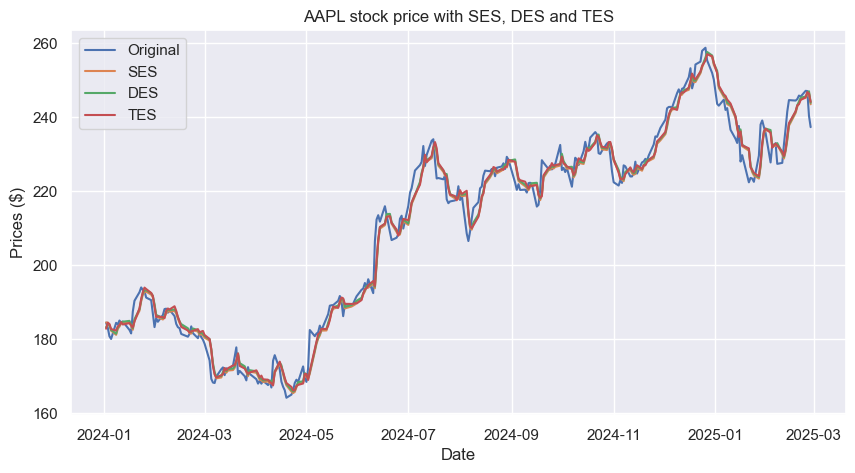

In [80]:
plt.figure(figsize = (10, 5))
plt.plot(df['Close'], label = 'Original')
plt.plot(df['SES'], label = 'SES')
plt.plot(df['DES'], label = 'DES')
plt.plot(df['TES'], label = 'TES')
plt.xlabel('Date')
plt.ylabel('Prices ($)')
plt.title('AAPL stock price with SES, DES and TES')
plt.legend(loc = 'upper left')
plt.show()

# Granger Causility Test

# Autocorrelation and Partial Autocorrelation Function
## 1. AutoCorrelation Function (ACF)
Autocorrelation in time series measures how a value in a series is related to its past values.

It helps to decide the $p$ parameter for $AR$ model

$r_k = \frac{\sum_{t = 1}^{n-k}(x_t - \bar{x})(x_{t+k} - \bar{x})}{\sum_{t = 1}^{n}(x_{t+k} - \bar{x})^2}$
-
- $r_k$ = Autocorrelation at lag $k$
- $x_t$ = Value at time $t$
- $x_{t+k}$ = Value at time $t+k$
- $\bar{x}$ = Mean of the time series
- $n$ = Number of observations

> - $x_t$ with $x_{t-1}$
> - $x_{t-1}$ with $x_{t-2}$
> - $x_{t-2}$ with $x_{t-3}$

## 2. Partial Autocorrelation Function (PACF)
Measures the direct relationship between a time series and its lagged values, removing the influence of intermediate lags.

It helps to decide the $q$ parameter for $MA$ model

$\phi_{kk} = \frac{Cov(x_t, x_{t-k}|x_{t-1}, x_{t-2}, x_{t-3}, ... , x_{t-k+1})}{Var(x_t)}$
-

> - $x_t$ with $x_{t-1}$
> - $x_{t}$ with $x_{t-2}$
> - $x_{t}$ with $x_{t-3}$
___
- Slow decay in ACF & sharp cutoff in PACF → Suggests an AR(p) model.
- Sharp cutoff in ACF & slow decay in PACF → Suggests an MA(q) model.
- Slow decay in both ACF & PACF → Suggests a mixed ARMA(p, q) or ARIMA(p, d, q) model is differencing is done.
- Sharp cutoff in ACF & sharp cutoff in PACF → Suggests white noise

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [18]:
np.random.seed(42)
df1 = np.random.normal(0, 1, 1000)
df2 = np.cumsum(np.random.normal(0, 1, 1000))

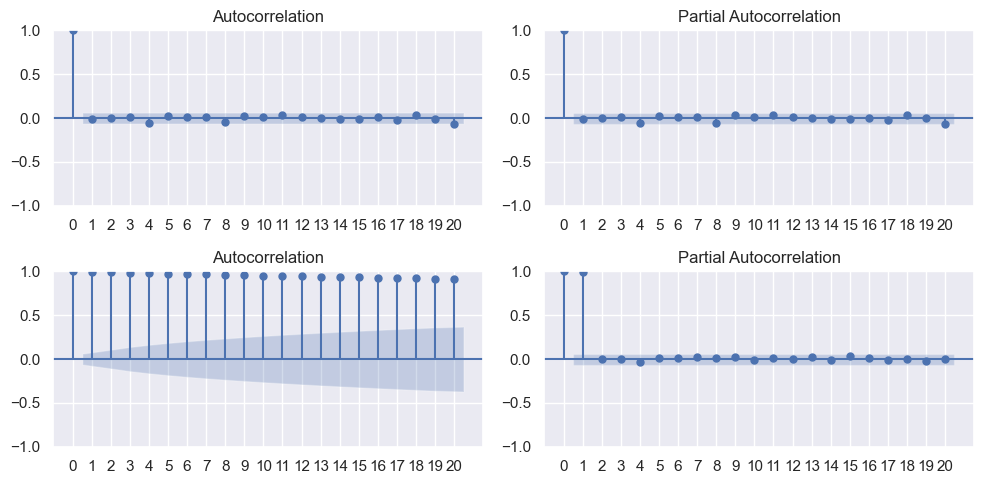

In [71]:
fig, ax = plt.subplots(2, 2, figsize = (10, 5))
ax = ax.flatten()

plot_acf(df1, lags = 20, ax = ax[0])
ax[0].set_xticks(np.arange(0, 21, 1))

plot_pacf(df1, lags = 20, ax = ax[1])
ax[1].set_xticks(np.arange(0, 21, 1))

plot_acf(df2, lags = 20, ax = ax[2])
ax[2].set_xticks(np.arange(0, 21, 1))

plot_pacf(df2, lags = 20, ax = ax[3])
ax[3].set_xticks(np.arange(0, 21, 1))

plt.tight_layout()
plt.show()

In [60]:
np.random.seed(42)
n = 100
steps = np.random.choice([-1, 1], size=n)
time_series = np.cumsum(steps)

In [61]:
# Set seed for reproducibility
np.random.seed(42)
n = 365
dates = pd.date_range(start = '2024-01-01', periods = n, freq = 'D')

In [62]:
# Generate trend (linear growth)
trend = np.linspace(100, 500, n)  # Sales gradually increase from 100 to 500

# Generate seasonality:
# - Weekly pattern (higher sales on weekends)
weekly_seasonality = 50 * np.sin(np.linspace(0, 2 * np.pi * (n / 7), n))

# - Monthly pattern (higher sales at the beginning of the month)
monthly_seasonality = 30 * np.sin(np.linspace(0, 2 * np.pi * (n / 30), n))

# Generate random noise
noise = np.random.normal(scale = 20, size = n)

# Combine all components
sales = trend + weekly_seasonality + monthly_seasonality + noise

# Ensure sales values are not negative
sales = np.maximum(sales, 0)

In [64]:
# Create DataFrame
df = pd.DataFrame({"Date": dates, "Sales": sales})
df.set_index('Date', inplace = True)
df.head()

,Sales
Date,
2024-01-01,109.934283
2024-01-02,143.756178
2024-01-03,176.076133
2024-01-04,172.793064
2024-01-05,99.915554


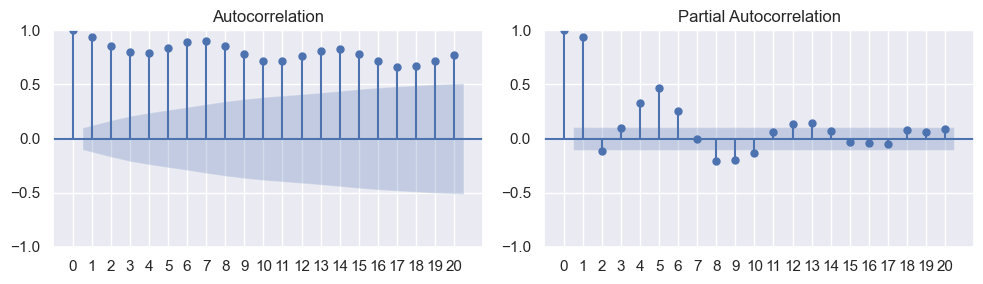

In [69]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3))
ax = ax.flatten()

plot_acf(df, lags = 20, ax = ax[0])
ax[0].set_xticks(np.arange(0, 21, 1))

plot_pacf(df, lags = 20, ax = ax[1])
ax[1].set_xticks(np.arange(0, 21, 1))

plt.tight_layout()
plt.show()

# Model Evaluation Metrics

## 1. Mean Absolute Error (MAE)
$MAE = \frac{1}{n}\sum|y_t-\hat{y_t}|$
-
___
## 2. Mean Squared Error (MSE)
$MSE = \frac{1}{n}\sum (y_t - \hat{y_t})^2$
-
___
## 3. Root Mean Squared Error (RMSE)
$RMSE = \sqrt{\frac{1}{n}\sum (y_t - \hat{y_t})^2}$
-
___
## 4. Mean Absolute Percentage Error (MAPE)
$MAPE = \frac{1}{n}\sum|\frac{y_t - \hat{y_t}}{y_t}|$ x $100$
-
___
## 5. Akaike Information Criteria (AIC)
Selects the model that explains the data well but is not overly complex.

$AIC = 2k - 2\ln{L}$
-
- $k$ = Number of parameters in the model
- $L$ = Maximum likelihood estimate (how well the model fits the data)
- Lower values of $AIC$ is preferred
___
## 6. Bayesian Information Criteria (BIC)
Selects the best model by considering how well the model fits the data and how many parameters it uses.

$BIC = k\ln(n) - 2\ln(L)$
-
- $k$ = Number of parameters in the model
- $n$ = Number of data points (sample size)
- $L$ = Maximum likelihood estimate (how well the model fits the data)
- Lower values of $BIC$ is preferred

# Data Preprocessing

## 1. Handling Missing Values
1. Imputation: Filling missing values with mean, median, mode, forward fill, backward fill.
2. Interpolation: Linear, Spline, Polynomial
3. Machine Learning Algorithms: Predictive Modelling (KNN imputer, MICE, etc.) 
## 2. Making Data Stationary
## 3. Handling Outlier
1. Imputation
2. Interpolation
3. Transformation
4. Smoothing techniques
## 4. Resampling
1. Upsampling: Increasing frequency
2. Downsampling: Decreasing frequency

In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [389]:
df = pd.DataFrame({
    'date': pd.date_range(start = '2024-01-01', periods = 12, freq = 'D'),
    'price': np.random.random_integers(low = 80, high = 120, size = 12) + np.random.rand(12).round(2)
})
df

,date,price
0,2024-01-01,114.87
1,2024-01-02,85.45
2,2024-01-03,116.52
3,2024-01-04,84.49
4,2024-01-05,112.67
5,2024-01-06,93.14
6,2024-01-07,91.03
7,2024-01-08,99.31
8,2024-01-09,103.70
9,2024-01-10,113.20


In [390]:
df.set_index('date', inplace = True)
df.price.iloc[2] = np.nan
df.price.iloc[3] = np.nan
df.price.iloc[5] = np.nan
df

,price
date,
2024-01-01,114.87
2024-01-02,85.45
2024-01-03,NaN
2024-01-04,NaN
2024-01-05,112.67
2024-01-06,NaN
2024-01-07,91.03
2024-01-08,99.31
2024-01-09,103.70


In [391]:
# Mean imputation
print(df.mean())
df.fillna(df.mean())

price    103.763333
dtype: float64


,price
date,
2024-01-01,114.870000
2024-01-02,85.450000
2024-01-03,103.763333
2024-01-04,103.763333
2024-01-05,112.670000
2024-01-06,103.763333
2024-01-07,91.030000
2024-01-08,99.310000
2024-01-09,103.700000


In [392]:
# Median imputation
print(df.median())
df.fillna(df.median())

price    104.67
dtype: float64


,price
date,
2024-01-01,114.87
2024-01-02,85.45
2024-01-03,104.67
2024-01-04,104.67
2024-01-05,112.67
2024-01-06,104.67
2024-01-07,91.03
2024-01-08,99.31
2024-01-09,103.70


In [393]:
# Mode imputation
print(df.mode().iloc[0])
df.fillna(df.mode().iloc[0])

price    85.45
Name: 0, dtype: float64


,price
date,
2024-01-01,114.87
2024-01-02,85.45
2024-01-03,85.45
2024-01-04,85.45
2024-01-05,112.67
2024-01-06,85.45
2024-01-07,91.03
2024-01-08,99.31
2024-01-09,103.70


In [394]:
# Forward fill
df.ffill()

,price
date,
2024-01-01,114.87
2024-01-02,85.45
2024-01-03,85.45
2024-01-04,85.45
2024-01-05,112.67
2024-01-06,112.67
2024-01-07,91.03
2024-01-08,99.31
2024-01-09,103.70


In [395]:
# Backward fill
df.bfill()

,price
date,
2024-01-01,114.87
2024-01-02,85.45
2024-01-03,112.67
2024-01-04,112.67
2024-01-05,112.67
2024-01-06,91.03
2024-01-07,91.03
2024-01-08,99.31
2024-01-09,103.70


In [396]:
# Linear interpolation
df.interpolate(method = 'linear')

,price
date,
2024-01-01,114.870000
2024-01-02,85.450000
2024-01-03,94.523333
2024-01-04,103.596667
2024-01-05,112.670000
2024-01-06,101.850000
2024-01-07,91.030000
2024-01-08,99.310000
2024-01-09,103.700000


In [397]:
# Spline interpolation
df.interpolate(method = 'spline', order = 2)

,price
date,
2024-01-01,114.870000
2024-01-02,85.450000
2024-01-03,84.319374
2024-01-04,104.356491
2024-01-05,112.670000
2024-01-06,101.979175
2024-01-07,91.030000
2024-01-08,99.310000
2024-01-09,103.700000


In [398]:
# Polynomial interpolation
df.interpolate(method = 'polynomial', order = 2)

,price
date,
2024-01-01,114.870000
2024-01-02,85.450000
2024-01-03,84.156990
2024-01-04,105.070755
2024-01-05,112.670000
2024-01-06,101.034508
2024-01-07,91.030000
2024-01-08,99.310000
2024-01-09,103.700000


In [399]:
df['sales'] = np.random.randint(1, 10, 12)*100
df

,price,sales
date,,
2024-01-01,114.87,100
2024-01-02,85.45,700
2024-01-03,NaN,800
2024-01-04,NaN,600
2024-01-05,112.67,500
2024-01-06,NaN,600
2024-01-07,91.03,200
2024-01-08,99.31,100
2024-01-09,103.70,700


In [400]:
from sklearn.linear_model import LinearRegression

kd = df.dropna(subset = 'price')
ud = df[df['price'].isnull().values]

lr = LinearRegression()
lr.fit(kd['sales'].values.reshape(-1, 1), kd['price'].values.reshape(-1, 1))

LinearRegression()

In [401]:
pred = lr.predict(ud['sales'].values.reshape(-1, 1))
pred

array([[101.95625483],
       [102.81223938],
       [102.81223938]])

In [408]:
df.resample('H').mean()

,price,sales
date,,
2024-01-01 00:00:00,114.87,100.0
2024-01-01 01:00:00,NaN,NaN
2024-01-01 02:00:00,NaN,NaN
2024-01-01 03:00:00,NaN,NaN
2024-01-01 04:00:00,NaN,NaN
...,...,...
2024-01-11 20:00:00,NaN,NaN
2024-01-11 21:00:00,NaN,NaN
2024-01-11 22:00:00,NaN,NaN


In [409]:
df.resample('S').mean()

,price,sales
date,,
2024-01-01 00:00:00,114.87,100.0
2024-01-01 00:00:01,NaN,NaN
2024-01-01 00:00:02,NaN,NaN
2024-01-01 00:00:03,NaN,NaN
2024-01-01 00:00:04,NaN,NaN
...,...,...
2024-01-11 23:59:56,NaN,NaN
2024-01-11 23:59:57,NaN,NaN
2024-01-11 23:59:58,NaN,NaN
